# NSL_KDD dataset

# libraries import

In [46]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import normalize, minmax_scale
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline

# DATA IMPORTATION

In [47]:
#importing the dataset
train=pd.read_csv('KDDTrain+.txt')
train.head(10)






,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.0,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
8,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.0,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
9,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,205,12,0.0,0.0,1.0,1.0,0.06,0.06,0.00,255,12,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [48]:
#importing the dataset
test=pd.read_csv('KDDTest+.txt')
test.head(10)

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,229,10,0.00,0.00.1,1.00,1.00.1,0.04,0.06,0.00.2,255,10.1,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
5,0,tcp,smtp,SF,1022,387,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,3,0.0,0.00,0.0,0.0,1.00,0.00,1.00,255,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
6,0,tcp,telnet,SF,129,174,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
7,0,tcp,http,SF,327,467,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,33,47,0.0,0.00,0.0,0.0,1.00,0.00,0.04,151,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
8,0,tcp,ftp,SF,26,157,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,52,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7
9,0,tcp,telnet,SF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,255,128,0.50,0.01,0.00,0.00,0.00,0.00,0.66,0.32,mscan,9


## Analysing Data


In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   0         125972 non-null  int64  
 1   tcp       125972 non-null  object 
 2   ftp_data  125972 non-null  object 
 3   SF        125972 non-null  object 
 4   491       125972 non-null  int64  
 5   0.1       125972 non-null  int64  
 6   0.2       125972 non-null  int64  
 7   0.3       125972 non-null  int64  
 8   0.4       125972 non-null  int64  
 9   0.5       125972 non-null  int64  
 10  0.6       125972 non-null  int64  
 11  0.7       125972 non-null  int64  
 12  0.8       125972 non-null  int64  
 13  0.9       125972 non-null  int64  
 14  0.10      125972 non-null  int64  
 15  0.11      125972 non-null  int64  
 16  0.12      125972 non-null  int64  
 17  0.13      125972 non-null  int64  
 18  0.14      125972 non-null  int64  
 19  0.15      125972 non-null  int64  
 20  0.16

In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        22543 non-null  int64  
 1   tcp      22543 non-null  object 
 2   private  22543 non-null  object 
 3   REJ      22543 non-null  object 
 4   0.1      22543 non-null  int64  
 5   0.2      22543 non-null  int64  
 6   0.3      22543 non-null  int64  
 7   0.4      22543 non-null  int64  
 8   0.5      22543 non-null  int64  
 9   0.6      22543 non-null  int64  
 10  0.7      22543 non-null  int64  
 11  0.8      22543 non-null  int64  
 12  0.9      22543 non-null  int64  
 13  0.10     22543 non-null  int64  
 14  0.11     22543 non-null  int64  
 15  0.12     22543 non-null  int64  
 16  0.13     22543 non-null  int64  
 17  0.14     22543 non-null  int64  
 18  0.15     22543 non-null  int64  
 19  0.16     22543 non-null  int64  
 20  0.17     22543 non-null  int64  
 21  0.18     225

In [51]:
train.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,0,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,20
count,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,45567.100824,19779.271433,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,0.001342,0.001103,0.302194,0.012669,0.000413,0.004096,0.000000,0.000008,0.009423,84.108207,27.738093,0.284487,0.282488,0.119959,0.121184,0.660925,0.063053,0.097322,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5870354.480801,4021285.112114,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,0.036603,0.045155,24.399715,0.483937,0.022181,0.099370,0.000000,0.002817,0.096613,114.508828,72.636092,0.446457,0.447024,0.320437,0.323648,0.439624,0.180315,0.259831,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,276.000000,516.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1379963888.000000,1309937401.000000,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.000000,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [52]:
train.shape

(125972, 43)

In [53]:
train.shape

(125972, 43)

In [54]:
train.isna().sum()

0           0
tcp         0
ftp_data    0
SF          0
491         0
0.1         0
0.2         0
0.3         0
0.4         0
0.5         0
0.6         0
0.7         0
0.8         0
0.9         0
0.10        0
0.11        0
0.12        0
0.13        0
0.14        0
0.15        0
0.16        0
0.18        0
2           0
2.1         0
0.00        0
0.00.1      0
0.00.2      0
0.00.3      0
1.00        0
0.00.4      0
0.00.5      0
150         0
25          0
0.17        0
0.03        0
0.17.1      0
0.00.6      0
0.00.7      0
0.00.8      0
0.05        0
0.00.9      0
normal      0
20          0
dtype: int64

# Data cleaning
columns treatments(add,delete,modify)

In [55]:
# #removing the last column
train=train.iloc[:,0:42]

#naming the attributes
train.columns=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land'
                                        ,'wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
                                      'root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files',
                                     'num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
                                       'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
                                      'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
                                     'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
                                     'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
                                      'dst_host_srv_rerror_rate','label']
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [56]:
# #removing the last column
test=test.iloc[:,0:42]

#naming the attributes
test.columns=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land'
                                        ,'wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
                                      'root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files',
                                     'num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
                                       'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
                                      'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
                                     'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
                                     'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
                                      'dst_host_srv_rerror_rate','label']
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal


# Preprocessing
classification binaire(dos=1,>dos=0)

In [57]:
print('Training set:')
for col_name in train.columns:
    if train[col_name].dtypes == 'object' :
        unique_cat = len(train[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))








Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories


In [58]:
print('Testing set:')
for col_name in test.columns:
    if test[col_name].dtypes == 'object' :
        unique_cat = len(test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Testing set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'label' has 38 categories


In [59]:
#print(train['service'].count_values())
if test['service'].dtypes == 'object' :
 unique_cat = test['service'].unique()   
 print(unique_cat)

['private' 'ftp_data' 'eco_i' 'telnet' 'http' 'smtp' 'ftp' 'ldap' 'pop_3'
 'courier' 'discard' 'ecr_i' 'imap4' 'domain_u' 'mtp' 'systat' 'iso_tsap'
 'other' 'csnet_ns' 'finger' 'uucp' 'whois' 'netbios_ns' 'link' 'Z39_50'
 'sunrpc' 'auth' 'netbios_dgm' 'uucp_path' 'vmnet' 'domain' 'name' 'pop_2'
 'http_443' 'urp_i' 'login' 'gopher' 'exec' 'time' 'remote_job' 'ssh'
 'kshell' 'sql_net' 'shell' 'hostnames' 'echo' 'daytime' 'pm_dump' 'IRC'
 'netstat' 'ctf' 'nntp' 'netbios_ssn' 'tim_i' 'supdup' 'bgp' 'nnsp' 'rje'
 'printer' 'efs' 'X11' 'ntp_u' 'klogin' 'tftp_u']


In [60]:
#print(train['service'].count_values())
if train['service'].dtypes == 'object' :
 unique_cat = train['service'].unique()   
 print(unique_cat)

['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']


<Axes: xlabel='count', ylabel='service'>

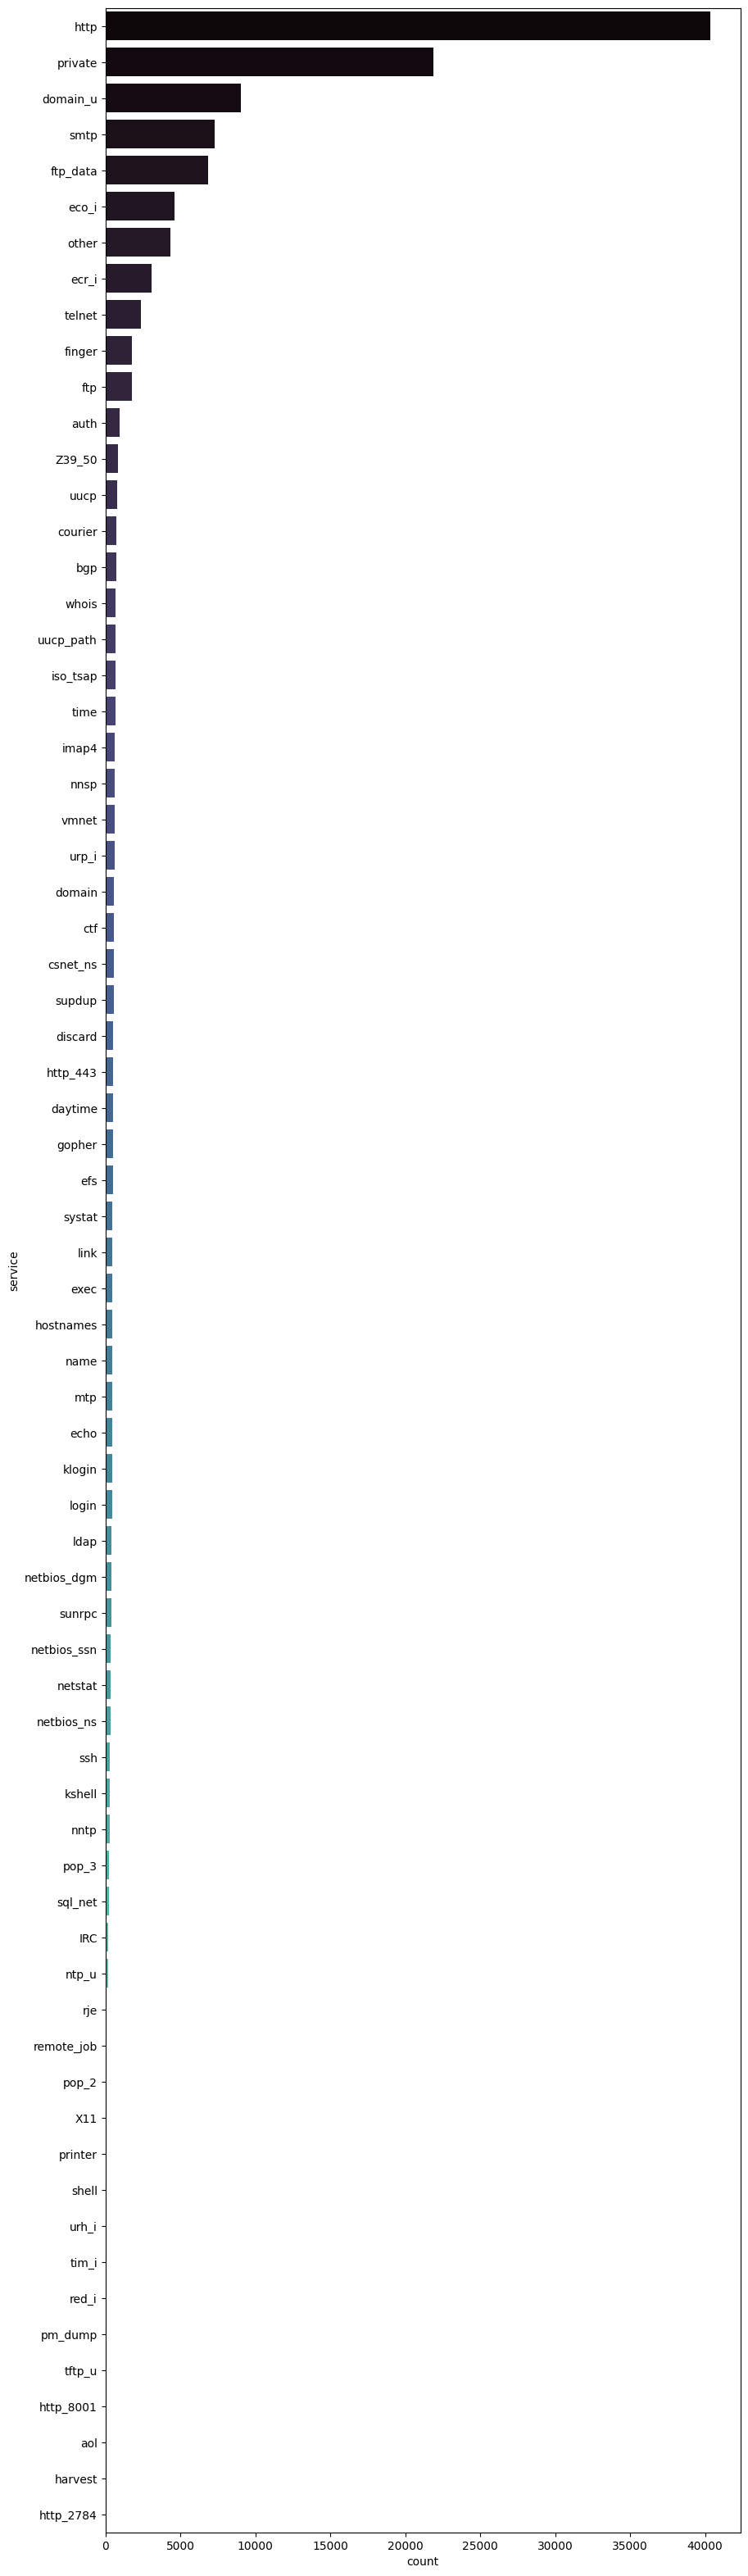

In [61]:
plt.figure(figsize=(10,40))
sns.countplot(palette='mako', y='service' , data=train, order = train['service'].value_counts().index)

In [62]:
if train['flag'].dtypes == 'object' :
 unique_cat = train['flag'].unique()   
 print(unique_cat)

['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']


<Axes: ylabel='flag'>

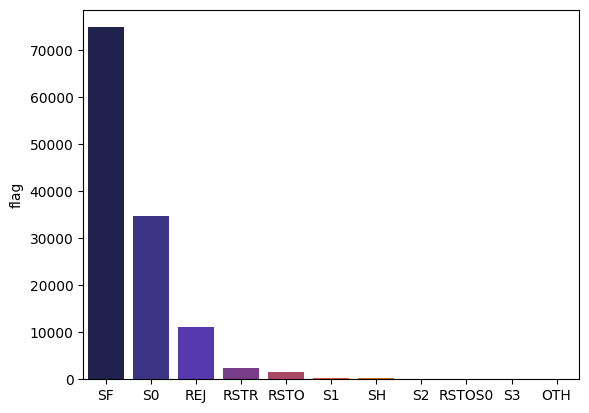

In [63]:
sns.barplot(x=train['flag'].value_counts().index, y=train['flag'].value_counts(), palette='CMRmap')


In [64]:
if train['protocol_type'].dtypes == 'object' :
 unique_cat = train['protocol_type'].unique()   
 print(unique_cat)

['udp' 'tcp' 'icmp']


<Axes: ylabel='protocol_type'>

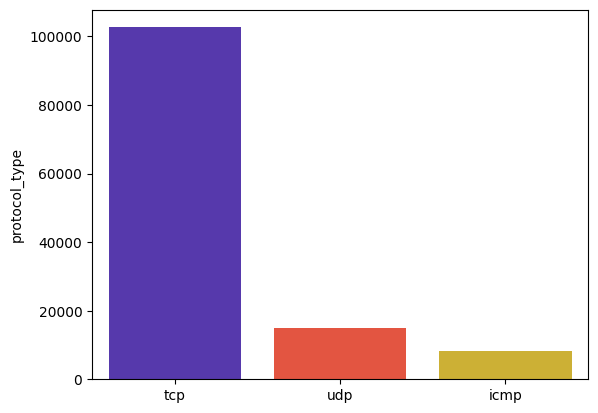

In [65]:
sns.barplot(x=train['protocol_type'].value_counts().index, y=train['protocol_type'].value_counts(), palette='CMRmap')


In [66]:
if train['label'].dtypes == 'object' :
 unique_cat = train['label'].unique()   
 print(unique_cat)

['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']


In [67]:
if test['label'].dtypes == 'object' :
 unique_cat = test['label'].unique()   
 print(unique_cat)

['neptune' 'normal' 'saint' 'mscan' 'guess_passwd' 'smurf' 'apache2'
 'satan' 'buffer_overflow' 'back' 'warezmaster' 'snmpgetattack'
 'processtable' 'pod' 'httptunnel' 'nmap' 'ps' 'snmpguess' 'ipsweep'
 'mailbomb' 'portsweep' 'multihop' 'named' 'sendmail' 'loadmodule' 'xterm'
 'worm' 'teardrop' 'rootkit' 'xlock' 'perl' 'land' 'xsnoop' 'sqlattack'
 'ftp_write' 'imap' 'udpstorm' 'phf']


In [68]:
set1 = {'normal' ,'neptune' ,'warezclient', 'ipsweep', 'portsweep', 'teardrop', 'nmap',
 'satan', 'smurf' ,'pod', 'back' ,'guess_passwd', 'ftp_write' ,'multihop',
 'rootkit' ,'buffer_overflow', 'imap' ,'warezmaster' ,'phf' ,'land',
 'loadmodule' ,'spy' ,'perl'}
set2 = {'neptune' ,'normal' ,'saint', 'mscan', 'guess_passwd', 'smurf', 'apache2',
 'satan' ,'buffer_overflow', 'back', 'warezmaster' ,'snmpgetattack',
 'processtable', 'pod', 'httptunnel', 'nmap' ,'ps' ,'snmpguess' ,'ipsweep',
 'mailbomb', 'portsweep', 'multihop', 'named', 'sendmail', 'loadmodule' ,'xterm',
 'worm' ,'teardrop', 'rootkit', 'xlock' ,'perl', 'land' ,'xsnoop', 'sqlattack',
 'ftp_write' ,'imap', 'udpstorm', 'phf'}
set3 = set1.union(set2)
print(set3)

{'phf', 'xlock', 'land', 'xterm', 'mscan', 'sqlattack', 'ipsweep', 'named', 'imap', 'httptunnel', 'nmap', 'pod', 'multihop', 'teardrop', 'saint', 'sendmail', 'neptune', 'spy', 'udpstorm', 'perl', 'loadmodule', 'normal', 'processtable', 'worm', 'smurf', 'snmpgetattack', 'portsweep', 'warezclient', 'apache2', 'ps', 'snmpguess', 'warezmaster', 'xsnoop', 'satan', 'ftp_write', 'back', 'mailbomb', 'buffer_overflow', 'rootkit', 'guess_passwd'}


# 1-N Encoding

In [69]:
train['protocol_type'].replace({ 'udp' : 0, 'tcp' : 1 ,'icmp': 2 },inplace = True)
train['flag'].replace({ 'OTH' : 0, 'REJ' : 1 ,'RSTO': 2 ,'RSTOS0':3 ,'RSTR': 4,'S0':5,
                           'S1':6,'S2':7, 'S3':8, 'SF':9,'SH':10 },inplace = True)
train['service'].replace({ 'other':0,'private':1,'http':2,'remote_job':3,'ftp_data':4,'name':5,'netbios_ns':6,'eco_i':7,'mtp':8,
    'telnet':9,'finger':10,'domain_u':11,'supdup':12, 'uucp_path':13,'Z39_50':14,'smtp':15,'csnet_ns':16,'uucp':17,'netbios_dgm':18,'urp_i':19,
    'auth':20,'domain':21,'ftp':22,'bgp':23,'ldap':24,'ecr_i':25,'gopher':26, 'vmnet':27,'systat':28,'http_443':29,
    'efs':30,'whois':31,'imap4':32,'iso_tsap':33,'echo':34,'klogin':35,'link':36,'sunrpc':37,'login':38,'kshell':39,
    'sql_net':40,'time':41,'hostnames':42,'exec':43,'ntp_u':44,'discard':45,'nntp':46,'courier':47,'ctf':48,'ssh':49,
    'daytime':50,'shell':51,'netstat':52,'pop_3':53,'nnsp':54,'IRC':55,'pop_2':56,'printer':57,'tim_i':58,'pm_dump':59,'red_i':60,
    'netbios_ssn':61,'rje':62,'X11':63,'urh_i':64,'http_8001':65,'aol':66,'http_2784':67,'tftp_u':68,'harvest':69},inplace = True)

In [70]:
test['protocol_type'].replace({ 'udp' : 0, 'tcp' : 1 ,'icmp': 2 },inplace = True)
test['flag'].replace({ 'OTH' : 0, 'REJ' : 1 ,'RSTO': 2 ,'RSTOS0':3 ,'RSTR': 4,'S0':5,
                           'S1':6,'S2':7, 'S3':8, 'SF':9,'SH':10 },inplace = True)
test['service'].replace({ 'other':0,'private':1,'http':2,'remote_job':3,'ftp_data':4,'name':5,'netbios_ns':6,'eco_i':7,'mtp':8,
    'telnet':9,'finger':10,'domain_u':11,'supdup':12, 'uucp_path':13,'Z39_50':14,'smtp':15,'csnet_ns':16,'uucp':17,'netbios_dgm':18,'urp_i':19,
    'auth':20,'domain':21,'ftp':22,'bgp':23,'ldap':24,'ecr_i':25,'gopher':26, 'vmnet':27,'systat':28,'http_443':29,
    'efs':30,'whois':31,'imap4':32,'iso_tsap':33,'echo':34,'klogin':35,'link':36,'sunrpc':37,'login':38,'kshell':39,
    'sql_net':40,'time':41,'hostnames':42,'exec':43,'ntp_u':44,'discard':45,'nntp':46,'courier':47,'ctf':48,'ssh':49,
    'daytime':50,'shell':51,'netstat':52,'pop_3':53,'nnsp':54,'IRC':55,'pop_2':56,'printer':57,'tim_i':58,'pm_dump':59,'red_i':60,
    'netbios_ssn':61,'rje':62,'X11':63,'urh_i':64,'http_8001':65,'aol':66,'http_2784':67,'tftp_u':68,'harvest':69},inplace = True)

In [71]:
# train['label'].replace({ 'teardrop':1, 'back':1, 'smurf':1, 'udpstorm':1, 'apache2':1, 'pod':1, 'land':1, 'mailbomb':1, 'processtable':1, 'nmap':1,                                           
#   'phf':0, 'xsnoop':0, 'worm':0, 'satan':0, 'buffer_overflow':0, 'named':0, 'perl':0, 'saint':0, 'guess_passwd':0,
# 'ipsweep':0, 'multihop':0, 'imap':0, 'mscan':0, 'loadmodule':0, 'ftp_write':0, 'rootkit':0, 'snmpguess':0, 'sendmail':0, 'warezmaster':0,
#     'normal':0, 'portsweep':0, 'snmpgetattack':0, 'sqlattack':0, 'httptunnel':0, 'ps':0, 'spy':0, 'xterm':0, 'warezclient':0,
#       'neptune':1  },inplace = True)

train['label'].replace({ 
'sendmail':0, 'mailbomb':0, 'imap':0, 'neptune':1, 'rootkit':0, 'back':0, 'udpstorm':1, 'phf':0, 'ftp_write':0,
'guess_passwd':0, 'pod':1, 'mscan':0, 'land':1, 'teardrop':1, 'sqlattack':0, 'named':0, 'warezmaster':0, 'multihop':0, 'loadmodule':0, 
'ps':0, 'warezclient':0, 'worm':0, 'snmpgetattack':0, 'httptunnel':0, 'portsweep':0, 'normal':0, 'perl':0, 'buffer_overflow':0, 'xlock':0, 
'ipsweep':0, 'apache2':1, 'processtable':0, 'xterm':0, 'spy':0, 'snmpguess':0, 'nmap':0, 'smurf':1, 'saint':1, 'xsnoop':0, 'satan':0
  },inplace = True)


test['label'].replace({ 
'sendmail':0, 'mailbomb':0, 'imap':0, 'neptune':1, 'rootkit':0, 'back':0, 'udpstorm':1, 'phf':0, 'ftp_write':0,
'guess_passwd':0, 'pod':1, 'mscan':0, 'land':1, 'teardrop':1, 'sqlattack':0, 'named':0, 'warezmaster':0, 'multihop':0, 'loadmodule':0, 
'ps':0, 'warezclient':0, 'worm':0, 'snmpgetattack':0, 'httptunnel':0, 'portsweep':0, 'normal':0, 'perl':0, 'buffer_overflow':0, 'xlock':0, 
'ipsweep':0, 'apache2':1, 'processtable':0, 'xterm':0, 'spy':0, 'snmpguess':0, 'nmap':0, 'smurf':1, 'saint':1, 'xsnoop':0, 'satan':0
  },inplace = True)
train.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,0,9,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.00,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
1,0,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.00,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
2,0,1,2,9,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.20,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
3,0,1,2,9,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.00,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
4,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.00,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
5,0,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.00,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
6,0,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.00,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,1
7,0,1,3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.00,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
8,0,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.00,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1
9,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,205,12,0.0,0.00,1.0,1.0,0.06,0.06,0.00,255,12,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1


In [72]:
counts = train["service"].value_counts()
print(counts)

2     40338
1     21853
11     9043
15     7313
4      6859
      ...  
68        3
65        2
66        2
69        2
67        1
Name: service, Length: 70, dtype: int64


In [73]:
train.shape


(125972, 42)

Balancing the label

In [74]:
train['label'].value_counts()

0    81001
1    44971
Name: label, dtype: int64

In [75]:
test['label'].value_counts()

0    16104
1     6439
Name: label, dtype: int64

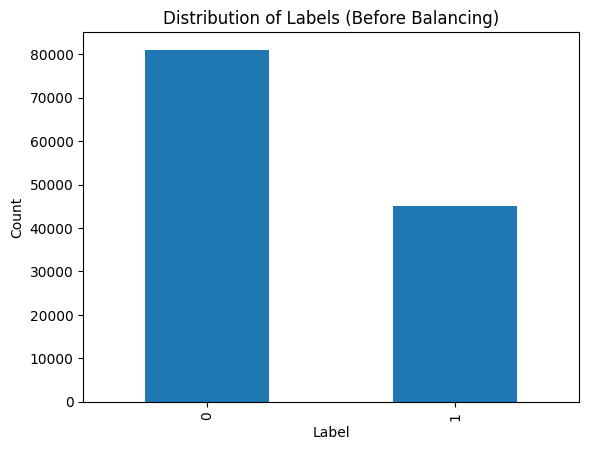

In [76]:
#before balancing the label
import matplotlib.pyplot as plt

# plot the distribution of the 'label' column before balancing
train['label'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (Before Balancing)')
plt.show()


In [77]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = train[train['label'] == 0]
df_minority = train[train['label'] == 1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=len(df_majority),    
                                 random_state=123)
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
train = df_upsampled

# Display new class counts
train['label'].value_counts()


0    81001
1    81001
Name: label, dtype: int64

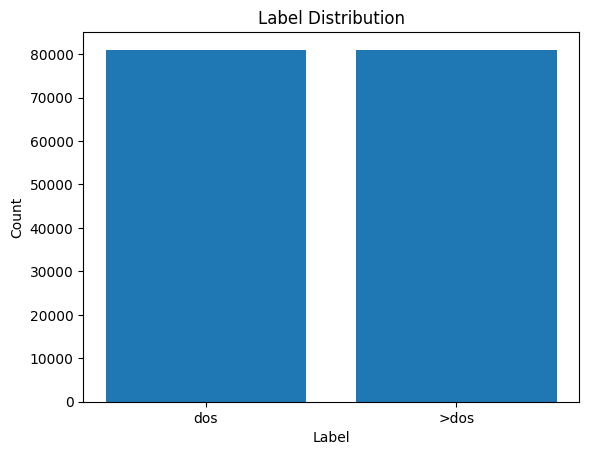

In [78]:
import matplotlib.pyplot as plt

# count the number of each label value in the balanced dataset
label_counts = train['label'].value_counts()

# plot a bar chart to show the label count
plt.bar(label_counts.index, label_counts.values)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['dos', '>dos'])
plt.show()




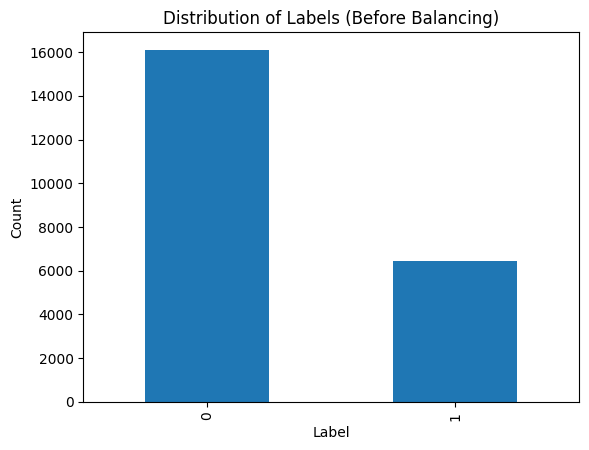

In [79]:
#balancing the test dataset
#before balancing the label
import matplotlib.pyplot as plt

# plot the distribution of the 'label' column before balancing
test['label'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (Before Balancing)')
plt.show()


In [80]:
#balancing the test dataset
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = test[test['label'] == 0]
df_minority = test[test['label'] == 1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=len(df_majority),    
                                 random_state=123)
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
test = df_upsampled

# Display new class counts
test['label'].value_counts()

0    16104
1    16104
Name: label, dtype: int64

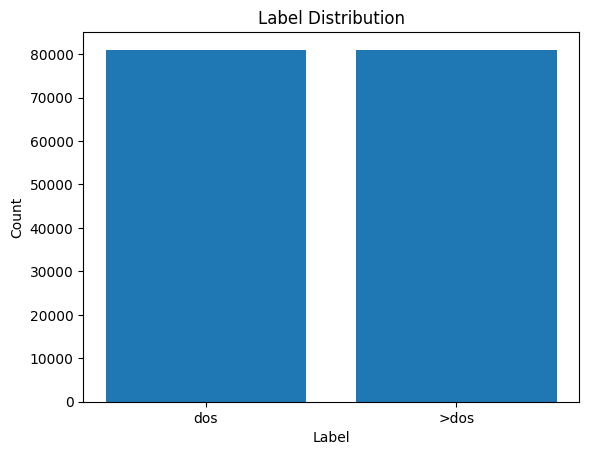

In [81]:
#balancing the test dataset
import matplotlib.pyplot as plt

# count the number of each label value in the balanced dataset
label_counts = train['label'].value_counts()

# plot a bar chart to show the label count
plt.bar(label_counts.index, label_counts.values)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['dos', '>dos'])
plt.show()


<Axes: >

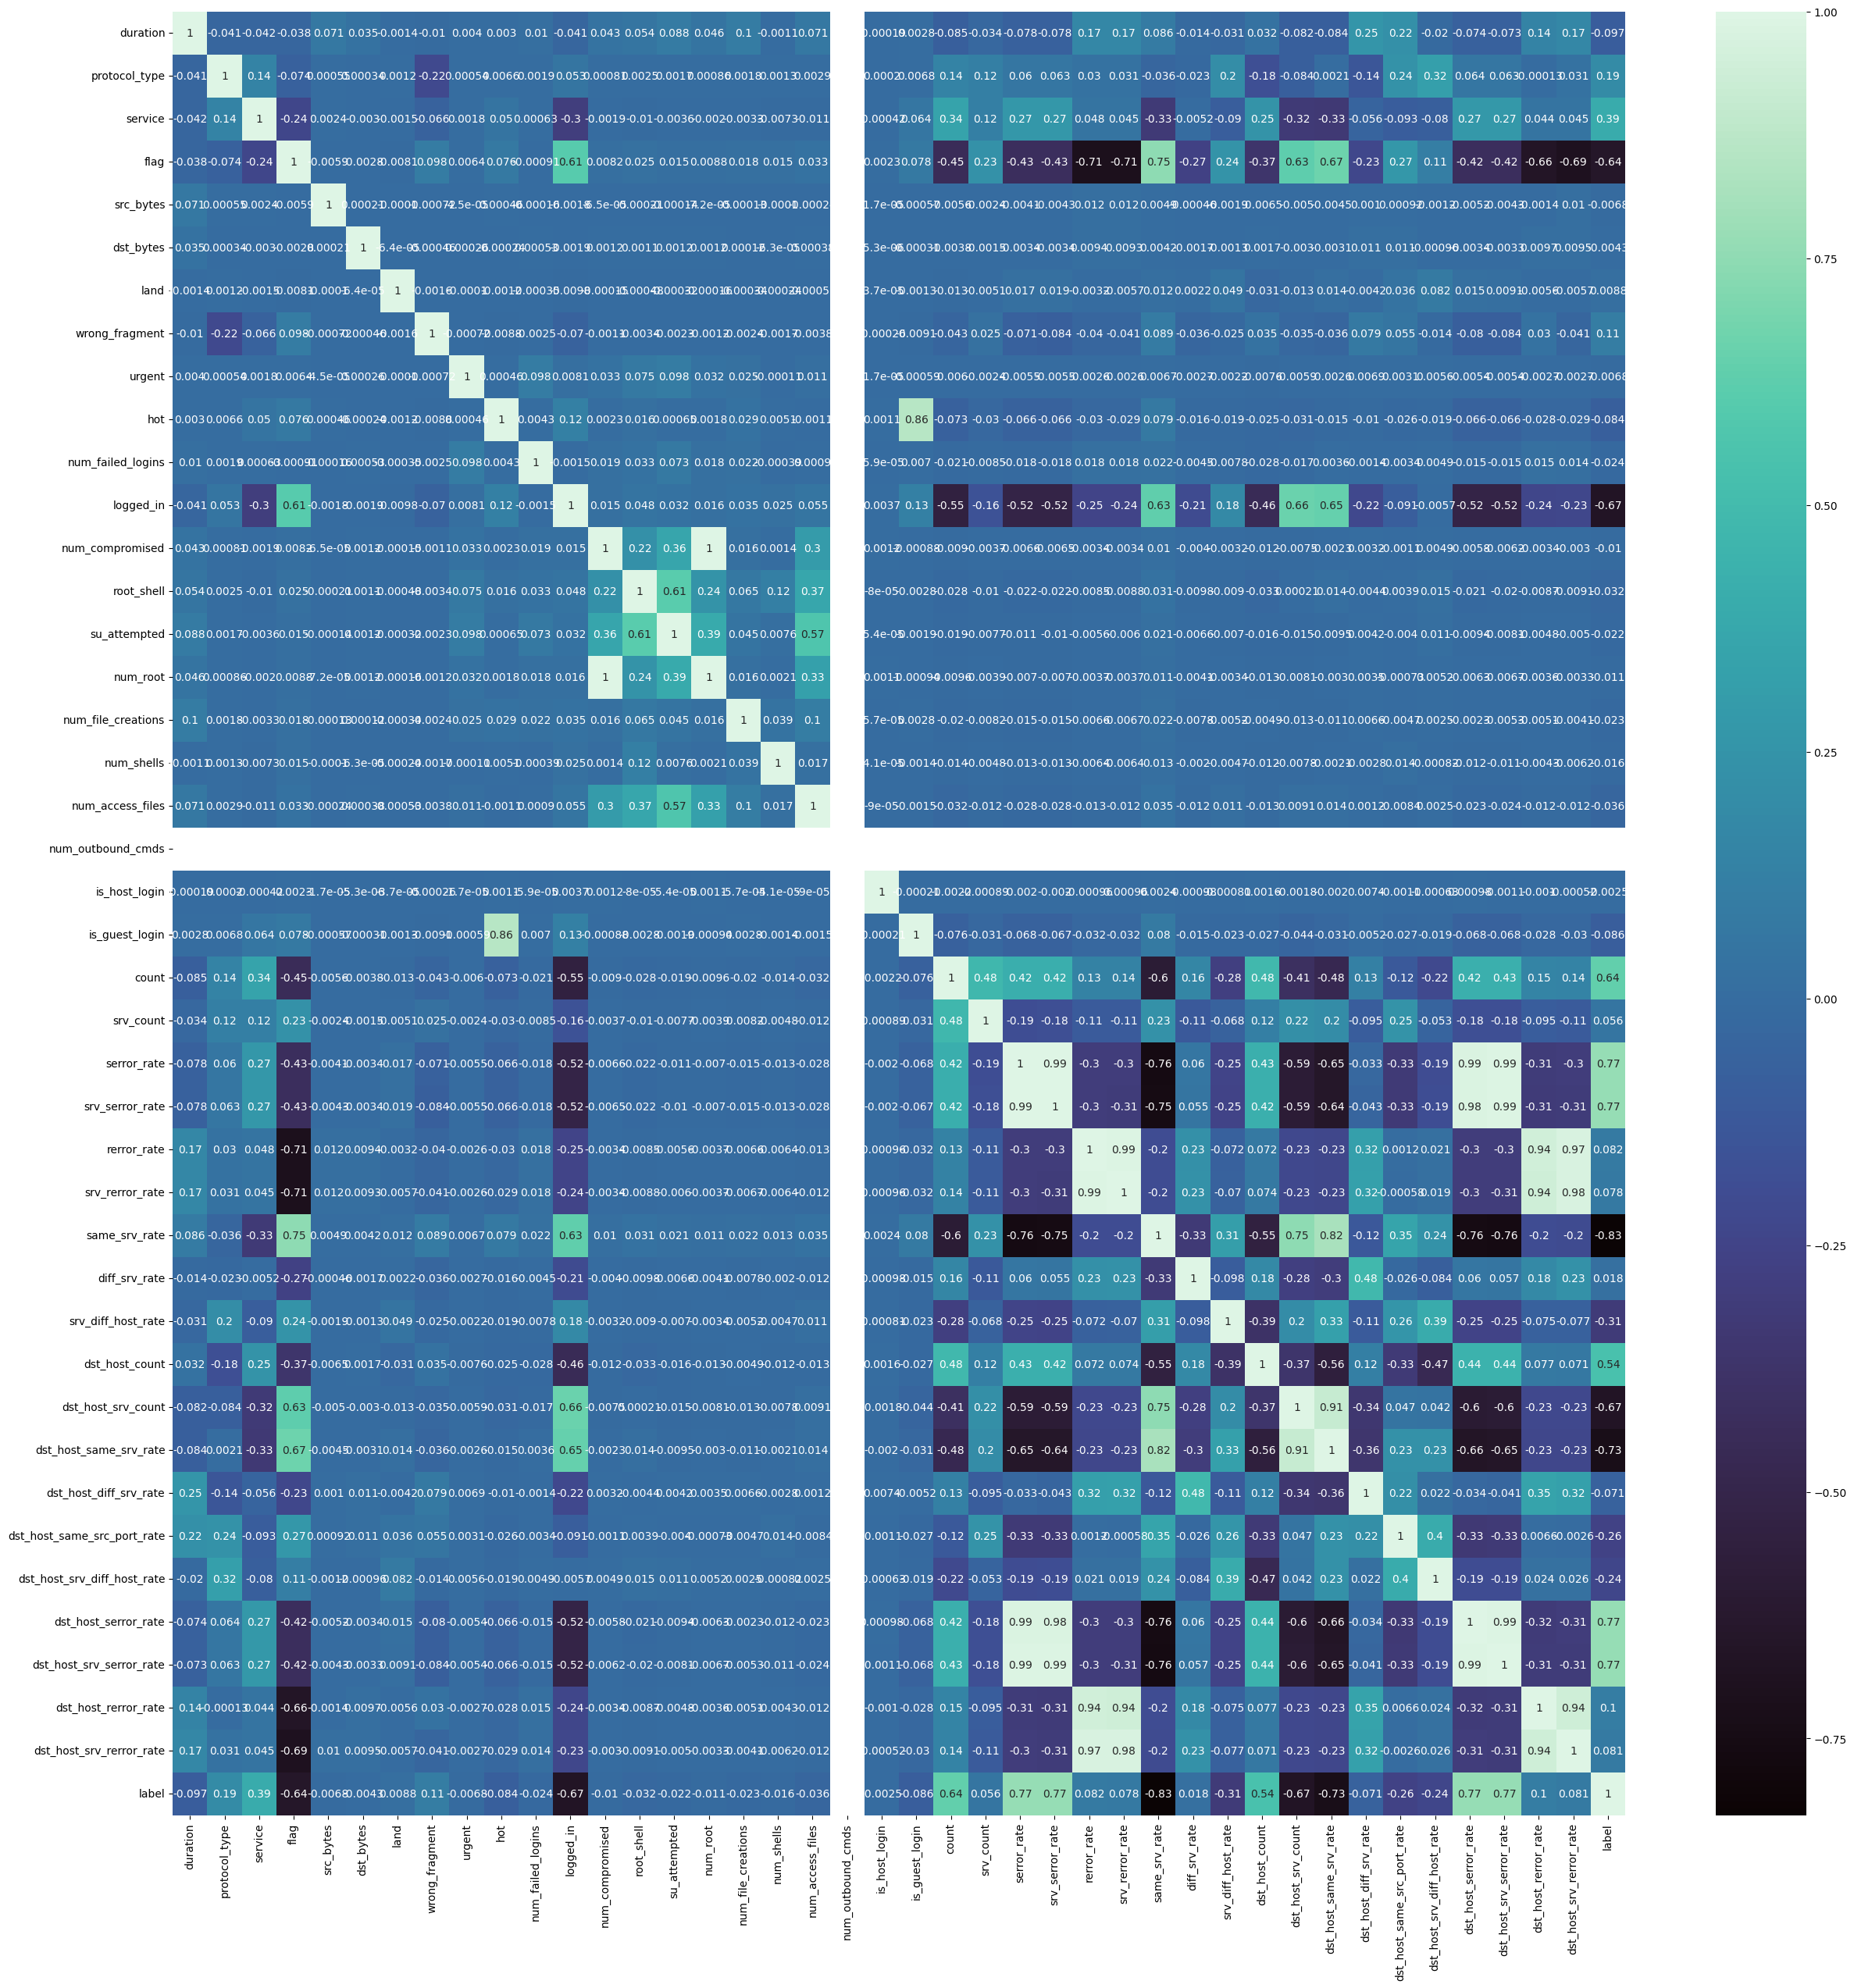

In [82]:
#apres encoding 
plt.figure(figsize=(30,30))
sns.heatmap(train.corr(), annot= True,cmap='mako')

Separate features and label

In [83]:
y_train = train.iloc[:, -1]  # select the last column (label) as y_train
x_train = train.iloc[:, :-1]  # select all columns except the last one as x_train

y_test = test.iloc[:, -1]  # select the last column (label) as y_test
x_test = test.iloc[:, :-1]  # select all columns except the last one as x_test

print(x_train.shape)
print(y_train.shape)

print(x_train.head())
print(y_train.head())




(162002, 41)
(162002,)
    duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0          0              0        0     9        146          0     0   
2          0              1        2     9        232       8153     0   
3          0              1        2     9        199        420     0   
11         0              1        2     9        287       2251     0   
12         0              1        4     9        334          0     0   

    wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
0                0       0    0                  0          0   
2                0       0    0                  0          1   
3                0       0    0                  0          1   
11               0       0    0                  0          1   
12               0       0    0                  0          1   

    num_compromised  root_shell  su_attempted  num_root  num_file_creations  \
0                 0           0             0         0       

# training the model
Train data with one or more chosen classification algorithms (DecisionTrees, SVM, KNN, Naive bayes, Logistic regression ...)

### Decision Tree

In [84]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

predicted = dt.predict(x_test)


accuracy1 = accuracy_score(y_test,predicted)
precision1 = precision_score(y_test,predicted)
recall1 = recall_score(y_test,predicted)
f1_1 = f1_score(y_test,predicted)
print("Accuracy:", accuracy1,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)


Accuracy: 0.926322652757079 

                Predicted DOS  Predicted Not DOS
Actual DOS              15879                225
Actual Not DOS           2148              13956 

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93     16104
           1       0.98      0.87      0.92     16104

    accuracy                           0.93     32208
   macro avg       0.93      0.93      0.93     32208
weighted avg       0.93      0.93      0.93     32208

False Alarm Rate: 0.013971684053651267


### RandomForest

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
# Fit the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
# Make predictions on test set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test,y_pred)
precision2 = precision_score(y_test,y_pred)
recall2 = recall_score(y_test,y_pred)
f1_2 = f1_score(y_test,y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy score: ", accuracy2)
print("Confusion matrix: \n", conf_mat)
report = classification_report(y_test,y_pred)
print("Classification report:\n", report)
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)

Accuracy score:  0.9099292101341282
Confusion matrix: 
 [[15878   226]
 [ 2675 13429]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92     16104
           1       0.98      0.83      0.90     16104

    accuracy                           0.91     32208
   macro avg       0.92      0.91      0.91     32208
weighted avg       0.92      0.91      0.91     32208

False Alarm Rate: 0.01403378042722305


### LogisticRegression

In [86]:
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression(max_iter=500)

Lr.fit(x_train,y_train)

predicted = Lr.predict(x_test)

accuracy3 = accuracy_score(y_test,predicted)
precision3 = precision_score(y_test,predicted)
recall3 = recall_score(y_test,predicted)
f1_3 = f1_score(y_test,predicted)
print("Accuracy:", accuracy3,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)

Accuracy: 0.9126304023845008 

                Predicted DOS  Predicted Not DOS
Actual DOS              15638                466
Actual Not DOS           2348              13756 

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92     16104
           1       0.97      0.85      0.91     16104

    accuracy                           0.91     32208
   macro avg       0.92      0.91      0.91     32208
weighted avg       0.92      0.91      0.91     32208

False Alarm Rate: 0.028936910084451067


### KNN

In [87]:
"""""""""""""""
k-NN Classifier

"""""""""""""""
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

kNN = KNeighborsClassifier(n_neighbors = 50, metric = 'minkowski', p = 1)

kNN.fit(x_train,y_train)

predicted = kNN.predict(x_test)
accuracy4 = accuracy_score(y_test,predicted)
precision4 = precision_score(y_test,predicted)
recall4 = recall_score(y_test,predicted)
f1_4 = f1_score(y_test,predicted)
print("Accuracy:", accuracy4,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)

Accuracy: 0.8902446597118728 

                Predicted DOS  Predicted Not DOS
Actual DOS              15356                748
Actual Not DOS           2787              13317 

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90     16104
           1       0.95      0.83      0.88     16104

    accuracy                           0.89     32208
   macro avg       0.90      0.89      0.89     32208
weighted avg       0.90      0.89      0.89     32208

False Alarm Rate: 0.04644808743169399


### Naive Bayes

In [88]:
"""""""""""""""
Naive Bayes Classifier

"""""""""""""""

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

NB = GaussianNB()

NB.fit(x_train,y_train)

predicted = NB.predict(x_test)
accuracy5 = accuracy_score(y_test,predicted)
precision5 = precision_score(y_test,predicted)
recall5 = recall_score(y_test,predicted)
f1_5 = f1_score(y_test,predicted)
print("Accuracy:", accuracy5,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

Accuracy: 0.6487518628912071 

                Predicted DOS  Predicted Not DOS
Actual DOS               5942              10162
Actual Not DOS           1151              14953 

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.37      0.51     16104
           1       0.60      0.93      0.73     16104

    accuracy                           0.65     32208
   macro avg       0.72      0.65      0.62     32208
weighted avg       0.72      0.65      0.62     32208



### SVM

In [89]:
# """""""""""""""
# SVM Classifier

# """""""""""""""
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix, classification_report

# # Create a SVM classifier with RBF kernel
# svm = SVC(kernel='rbf',random_state=88)

# # Train the classifier using the training data
# svm.fit(x_train,y_train)

# predicted = svm.predict(x_test)
# accuracy = accuracy_score(y_test,predicted)
# precision6 = precision_score(y_test,predicted)
# recall6 = recall_score(y_test,predicted)
# f1_6 = f1_score(y_test,predicted)
# print("Accuracy:", accuracy6,"\n")
# Conf_Mat = confusion_matrix(y_test,predicted)
# Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

# print(Conf_Mat,"\n")
# report = classification_report(y_test,predicted)
# print("Classification report:\n", report)

In [90]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Step 1: Define list of models
models = [
    LogisticRegression(max_iter=500),
    DecisionTreeClassifier(),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors = 50, metric = 'minkowski', p = 1),
    RandomForestClassifier(n_estimators=100, random_state=42)
]

# Step 2: Define dictionary to store evaluation metrics
eval_metrics = {}



# Step 4: Evaluate each model
for model in models:
    model_name = type(model).__name__
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    eval_metrics[model_name] = [accuracy, precision, recall, f1]

# Step 5: Convert dictionary to dataframe
df = pd.DataFrame(eval_metrics, index=['accuracy', 'precision', 'recall', 'f1-score'])

# Step 6: Return dataframe
print(df)


           LogisticRegression  DecisionTreeClassifier  GaussianNB  \
accuracy             0.912630                0.926074    0.648752   
precision            0.967234                0.983579    0.595381   
recall               0.854198                0.866617    0.928527   
f1-score             0.907208                0.921401    0.725539   

           KNeighborsClassifier  RandomForestClassifier  
accuracy               0.890245                0.909929  
precision              0.946818                0.983449  
recall                 0.826937                0.833892  
f1-score               0.882827                0.902517  


### results of the models

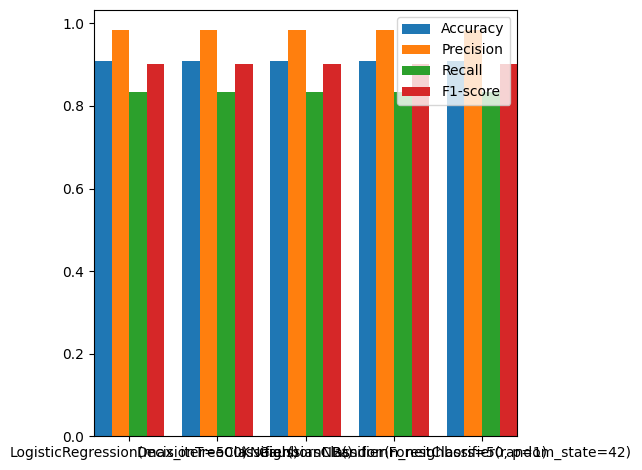

In [91]:

width = 0.2
x = np.arange(len(models))
fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1, width, label='F1-score')

ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
# add spacing between models
ax.set_xlim(x[0]-width*2, x[-1]+width*2)
plt.tight_layout()

plt.show()

Logarithme scaling

# Normalisation

In [92]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
 
train=pd.DataFrame(scaler.fit_transform(train),
            columns=train.columns, index=train.index) 

test=pd.DataFrame(scaler.transform(test),
            columns=test.columns, index=test.index) 

train.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.000000,0.0,0.000000,0.9,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.025440,0.001957,0.0,0.00,0.00,0.00,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.0
2,0.000000,0.5,0.028986,0.9,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.009785,0.009785,0.2,0.20,0.00,0.00,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0.0
3,0.000000,0.5,0.028986,0.9,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.058708,0.062622,0.0,0.00,0.00,0.00,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
11,0.000000,0.5,0.028986,0.9,2.079765e-07,1.718403e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.005871,0.013699,0.0,0.00,0.00,0.00,1.00,0.00,0.43,0.031373,0.858824,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,0.0
12,0.000000,0.5,0.057971,0.9,2.420353e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.003914,0.003914,0.0,0.00,0.00,0.00,1.00,0.00,0.00,0.007843,0.078431,1.00,0.00,1.00,0.20,0.00,0.00,0.00,0.00,0.0
15,0.000000,0.5,0.028986,0.9,2.173970e-07,1.052569e-05,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.015656,0.017613,0.0,0.11,0.00,0.00,1.00,0.00,0.22,0.356863,1.000000,1.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00,0.0
16,0.000000,1.0,0.101449,0.9,1.304382e-08,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.001957,0.001957,0.0,0.00,0.00,0.00,1.00,0.00,0.00,0.003922,0.062745,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.0
17,0.000000,0.5,0.028986,0.9,1.688450e-07,4.702515e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.005871,0.005871,0.0,0.00,0.00,0.00,1.00,0.00,0.00,0.258824,1.000000,1.00,0.00,0.02,0.03,0.00,0.00,0.02,0.00,0.0
18,0.000000,0.5,0.028986,0.9,2.485572e-07,8.992796e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.017613,0.019569,0.0,0.00,0.00,0.00,1.00,0.00,0.20,0.615686,1.000000,1.00,0.00,0.01,0.04,0.00,0.00,0.00,0.00,0.0
21,0.000000,0.5,0.028986,0.9,1.833381e-07,9.088221e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.015656,0.019569,0.0,0.00,0.00,0.00,1.00,0.00,0.20,0.341176,1.000000,1.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00,0.0


### DecisionTree

In [93]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

predicted = dt.predict(x_test)


accuracy1 = accuracy_score(y_test,predicted)
precision1 = precision_score(y_test,predicted)                 
recall1 = recall_score(y_test,predicted)
f1_1 = f1_score(y_test,predicted)


print("Accuracy:", accuracy1,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)

Accuracy: 0.9262605563835072 

                Predicted DOS  Predicted Not DOS
Actual DOS              15877                227
Actual Not DOS           2148              13956 

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93     16104
           1       0.98      0.87      0.92     16104

    accuracy                           0.93     32208
   macro avg       0.93      0.93      0.93     32208
weighted avg       0.93      0.93      0.93     32208

False Alarm Rate: 0.014095876800794833


# Confusion matrix

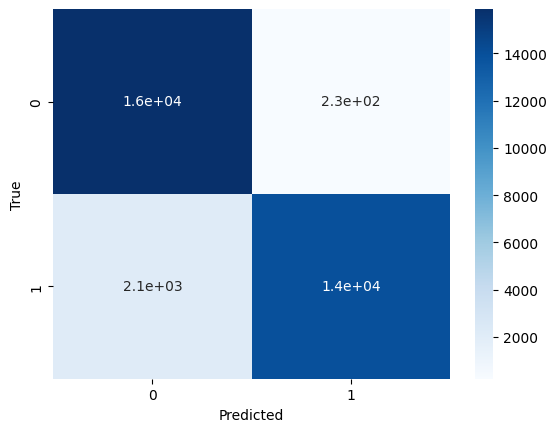

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     16104
           1       0.98      0.87      0.92     16104

    accuracy                           0.93     32208
   macro avg       0.93      0.93      0.93     32208
weighted avg       0.93      0.93      0.93     32208



In [94]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# plot the confusion matrix
cm = confusion_matrix(y_test, predicted)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# print the classification report
cr = classification_report(y_test, predicted)
print(cr)

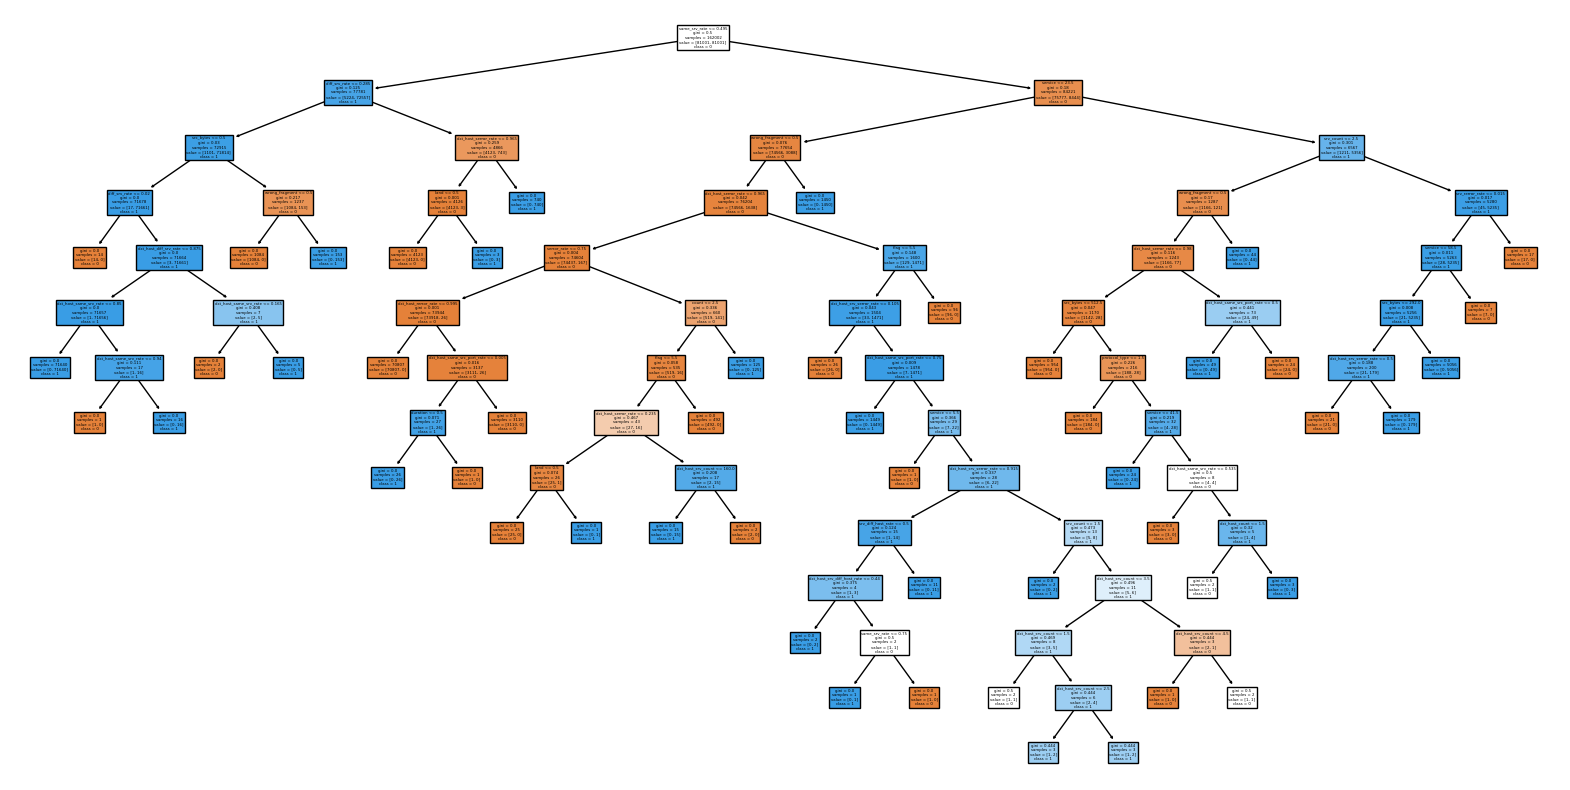

In [95]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=x_train.columns, class_names=['0','1'], filled=True)
plt.show()

In [96]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
from sklearn.tree import export_graphviz
dot_data=export_graphviz(dt,out_file='tree.dot',feature_names=x_train.columns,filled=True)

### RandomForest

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
# Fit the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=88)
model.fit(x_train, y_train)
# Make predictions on test set
y_pred = model.predict(x_test)


# Evaluate the model
accuracy2 = accuracy_score(y_test,y_pred)
precision2 = precision_score(y_test,y_pred)
recall2 = recall_score(y_test,y_pred)
f1_2 = f1_score(y_test,y_pred)

conf_mat = confusion_matrix(y_test, y_pred)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,y_pred)
print("Classification report:\n", report)

# Print the results
print("Accuracy score: ", accuracy2)
print("Confusion matrix: \n", conf_mat)
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)


                Predicted DOS  Predicted Not DOS
Actual DOS              15877                227
Actual Not DOS           2148              13956 

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91     16104
           1       0.98      0.83      0.90     16104

    accuracy                           0.91     32208
   macro avg       0.92      0.91      0.91     32208
weighted avg       0.92      0.91      0.91     32208

Accuracy score:  0.9068554396423248
Confusion matrix: 
 [[15876   228]
 [ 2772 13332]]
False Alarm Rate: 0.014157973174366617


### Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression(max_iter=500)

Lr.fit(x_train,y_train)

predicted = Lr.predict(x_test)

accuracy3 = accuracy_score(y_test,predicted)
precision3 = precision_score(y_test,predicted)
recall3 = recall_score(y_test,predicted)
f1_3 = f1_score(y_test,predicted)

print("Accuracy:", accuracy3,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)

Accuracy: 0.9126304023845008 

                Predicted DOS  Predicted Not DOS
Actual DOS              15638                466
Actual Not DOS           2348              13756 

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92     16104
           1       0.97      0.85      0.91     16104

    accuracy                           0.91     32208
   macro avg       0.92      0.91      0.91     32208
weighted avg       0.92      0.91      0.91     32208

False Alarm Rate: 0.028936910084451067


### KNN

In [100]:
"""""""""""""""
k-NN Classifier

"""""""""""""""
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

kNN = KNeighborsClassifier(n_neighbors = 50, metric = 'minkowski', p = 1)

kNN.fit(x_train,y_train)

predicted = kNN.predict(x_test)
accuracy4 = accuracy_score(y_test,predicted)
precision4 = precision_score(y_test,predicted)
recall4 = recall_score(y_test,predicted)
f1_4 = f1_score(y_test,predicted)

print("Accuracy:", accuracy4,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)

Accuracy: 0.8902446597118728 

                Predicted DOS  Predicted Not DOS
Actual DOS              15356                748
Actual Not DOS           2787              13317 

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90     16104
           1       0.95      0.83      0.88     16104

    accuracy                           0.89     32208
   macro avg       0.90      0.89      0.89     32208
weighted avg       0.90      0.89      0.89     32208

False Alarm Rate: 0.04644808743169399


### Naive Bayes

In [101]:
"""""""""""""""
Naive Bayes Classifier

"""""""""""""""

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

NB = GaussianNB()

NB.fit(x_train,y_train)

predicted = NB.predict(x_test)

accuracy5 = accuracy_score(y_test,predicted)
precision5 = precision_score(y_test,predicted)
recall5 = recall_score(y_test,predicted)
f1_5 = f1_score(y_test,predicted)
print("Accuracy:", accuracy5,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

Accuracy: 0.6487518628912071 

                Predicted DOS  Predicted Not DOS
Actual DOS               5942              10162
Actual Not DOS           1151              14953 

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.37      0.51     16104
           1       0.60      0.93      0.73     16104

    accuracy                           0.65     32208
   macro avg       0.72      0.65      0.62     32208
weighted avg       0.72      0.65      0.62     32208



### SVM

In [102]:
# """""""""""""""
# SVM Classifier

# """""""""""""""
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix, classification_report

# # Create a SVM classifier with RBF kernel
# svm = SVC(kernel='rbf',random_state=88)

# # Train the classifier using the training data
# svm.fit(x_train,y_train)

# predicted = svm.predict(x_test)
# accuracy = accuracy_score(y_test,predicted)
# precision6 = precision_score(y_test,predicted)
# recall6 = recall_score(y_test,predicted)
# f1_6 = f1_score(y_test,predicted)
# print("Accuracy:", accuracy6,"\n")
# Conf_Mat = confusion_matrix(y_test,predicted)
# Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

# print(Conf_Mat,"\n")
# report = classification_report(y_test,predicted)
# print("Classification report:\n", report)

### RandomForest

In [103]:
from sklearn.ensemble import RandomForestClassifier
Rf =  RandomForestClassifier(n_estimators = 110, max_depth = 30, random_state=88)
Rf.fit(x_train, y_train)



predicted = Rf.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

Accuracy: 0.9067933432687532 

                Predicted DOS  Predicted Not DOS
Actual DOS              15875                229
Actual Not DOS           2773              13331 

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91     16104
           1       0.98      0.83      0.90     16104

    accuracy                           0.91     32208
   macro avg       0.92      0.91      0.91     32208
weighted avg       0.92      0.91      0.91     32208



### Results

In [104]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Step 1: Define list of models
models = [
    LogisticRegression(max_iter=500),
    DecisionTreeClassifier(),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors = 50, metric = 'minkowski', p = 1),
    RandomForestClassifier(n_estimators=100, random_state=42)
]

# Step 2: Define dictionary to store evaluation metrics
eval_metrics = {}



# Step 4: Evaluate each model
for model in models:
    model_name = type(model).__name__
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    eval_metrics[model_name] = [accuracy, precision, recall, f1]

# Step 5: Convert dictionary to dataframe
df = pd.DataFrame(eval_metrics, index=['accuracy', 'precision', 'recall', 'f1-score'])

# Step 6: Return dataframe
print(df)


           LogisticRegression  DecisionTreeClassifier  GaussianNB  \
accuracy             0.912630                0.926136    0.648752   
precision            0.967234                0.983717    0.595381   
recall               0.854198                0.866617    0.928527   
f1-score             0.907208                0.921462    0.725539   

           KNeighborsClassifier  RandomForestClassifier  
accuracy               0.890245                0.909929  
precision              0.946818                0.983449  
recall                 0.826937                0.833892  
f1-score               0.882827                0.902517  


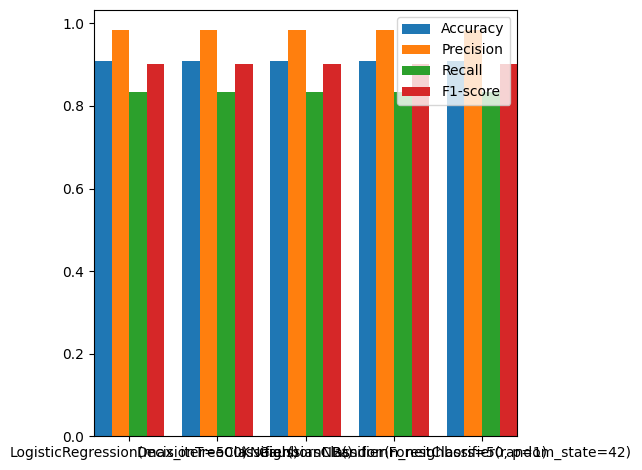

In [105]:
width = 0.2
x = np.arange(len(models))
fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1, width, label='F1-score')

ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
# add spacing between models
ax.set_xlim(x[0]-width*2, x[-1]+width*2)
plt.tight_layout()

plt.show()

# features selection

## RandomForestClassifier feature selection+Classification

#### random forest

In [106]:
# Load the dataset

from sklearn.feature_selection import SelectFromModel


# Import the required libraries
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the Random Forest Classifier
sel =SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=88))

# Train the classifier using the training set
sel.fit(x_train, y_train)

# Get the feature importances
sel.get_support()
# Sort the features based on their importances in descending order
selected_fet=x_train.columns[(sel.get_support())]

print('nbr of features selected  ',len(selected_fet))

print(' features selected  ',selected_fet)



# Train a new classifier using only the selected features
rf_new = RandomForestClassifier(n_estimators=100)
rf_new.fit(x_train.loc[:, selected_fet], y_train)

# Test the new classifier using the testing set and evaluate its performance
y_pred = rf_new.predict(x_test.loc[:, selected_fet])
score = rf_new.score(x_test.loc[:, selected_fet], y_test)
print("Accuracy score: ", score)


Conf_Mat = confusion_matrix(y_test,y_pred)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,y_pred)
print("Classification report:\n", report)
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)


nbr of features selected   12
 features selected   Index(['service', 'flag', 'src_bytes', 'dst_bytes', 'count', 'serror_rate',
       'srv_serror_rate', 'same_srv_rate', 'diff_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate'],
      dtype='object')
Accuracy score:  0.9211997019374069
                Predicted DOS  Predicted Not DOS
Actual DOS              15873                231
Actual Not DOS           2307              13797 

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93     16104
           1       0.98      0.86      0.92     16104

    accuracy                           0.92     32208
   macro avg       0.93      0.92      0.92     32208
weighted avg       0.93      0.92      0.92     32208

False Alarm Rate: 0.014344262295081968


#### logistic regression

In [107]:
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression(max_iter=500)

Lr.fit(x_train.loc[:, selected_fet], y_train)

predicted = Lr.predict(x_test.loc[:, selected_fet])

accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)

Accuracy: 0.9152074018877298 

                Predicted DOS  Predicted Not DOS
Actual DOS              15923                181
Actual Not DOS           2550              13554 

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92     16104
           1       0.99      0.84      0.91     16104

    accuracy                           0.92     32208
   macro avg       0.92      0.92      0.91     32208
weighted avg       0.92      0.92      0.91     32208

False Alarm Rate: 0.011239443616492796


In [108]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Step 1: Define list of models
models = [
    LogisticRegression(max_iter=500),
    RandomForestClassifier(n_estimators=100,random_state=88)
]

# Step 2: Define dictionary to store evaluation metrics
eval_metrics = {}



# Step 4: Evaluate each model
for model in models:
    model_name = type(model).__name__
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    eval_metrics[model_name] = [accuracy, precision, recall, f1]

# Step 5: Convert dictionary to dataframe
df = pd.DataFrame(eval_metrics, index=['accuracy', 'precision', 'recall', 'f1-score'])

# Step 6: Return dataframe
print(df)

           LogisticRegression  RandomForestClassifier
accuracy             0.912630                0.906855
precision            0.967234                0.983186
recall               0.854198                0.827869
f1-score             0.907208                0.898867


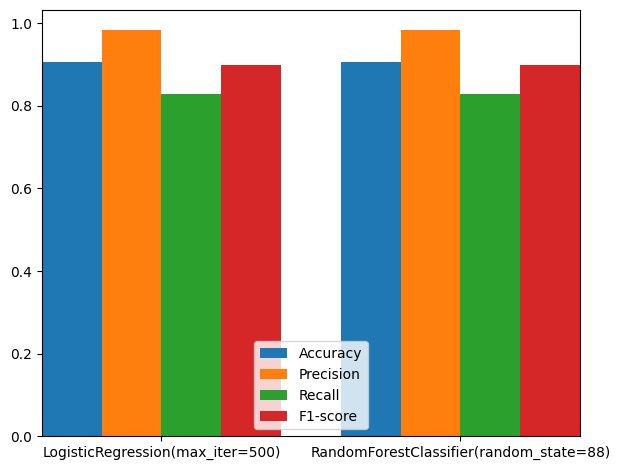

In [109]:
width = 0.2
x = np.arange(len(models))
fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1, width, label='F1-score')

ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
# add spacing between models
ax.set_xlim(x[0]-width*2, x[-1]+width*2)
plt.tight_layout()

plt.show()

## RFEClassifier feature selection+Classification

#### Decision tree

Accuracy: 0.9259500745156483 

                Predicted DOS  Predicted Not DOS
Actual DOS              15872                232
Actual Not DOS           2153              13951 

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93     16104
           1       0.98      0.87      0.92     16104

    accuracy                           0.93     32208
   macro avg       0.93      0.93      0.93     32208
weighted avg       0.93      0.93      0.93     32208



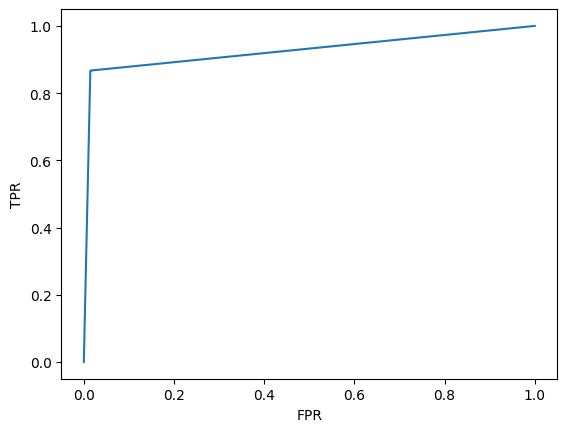

0.9263137069307821
False Alarm Rate: 0.014406358668653751


In [110]:

from sklearn.feature_selection import RFE
estimator = DecisionTreeClassifier()
selector = RFE(estimator)

selector = selector.fit(x_train, y_train)


predicted = selector.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = selector.predict_proba(x_test)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)



#### Random forest

Accuracy: 0.9143380526577248 

                Predicted DOS  Predicted Not DOS
Actual DOS              15873                231
Actual Not DOS           2528              13576 

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92     16104
           1       0.98      0.84      0.91     16104

    accuracy                           0.91     32208
   macro avg       0.92      0.91      0.91     32208
weighted avg       0.92      0.91      0.91     32208



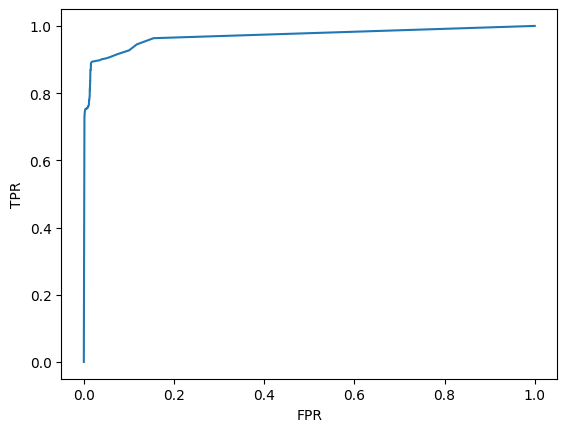

0.9699914936759795
False Alarm Rate: 0.014344262295081968


In [111]:
from sklearn.feature_selection import RFE
estimator = RandomForestClassifier(n_estimators =100)
selector = RFE(estimator)
selector = selector.fit(x_train, y_train)
predicted = selector.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = selector.predict_proba(x_test)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)

#### Logistic Regression

Accuracy: 0.9182190760059612 

                Predicted DOS  Predicted Not DOS
Actual DOS              15830                274
Actual Not DOS           2360              13744 

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     16104
           1       0.98      0.85      0.91     16104

    accuracy                           0.92     32208
   macro avg       0.93      0.92      0.92     32208
weighted avg       0.93      0.92      0.92     32208



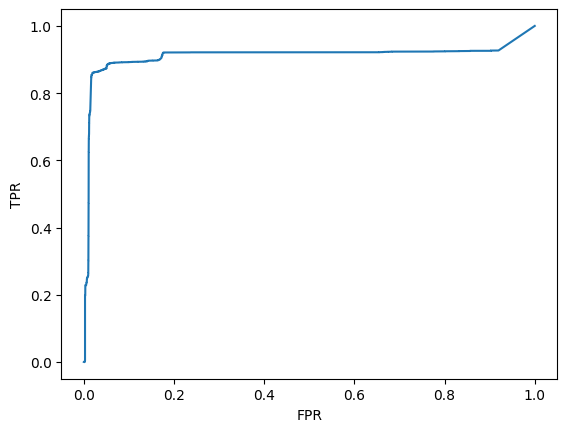

0.9113835547086018
False Alarm Rate: 0.017014406358668653


In [112]:
from sklearn.feature_selection import RFE
estimator = LogisticRegression()
selector = RFE(estimator)
selector = selector.fit(x_train, y_train)
predicted = selector.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = selector.predict_proba(x_test)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)

In [113]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Step 1: Define list of models
models = [
    LogisticRegression(max_iter=500),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators =100)
]

# Step 2: Define dictionary to store evaluation metrics
eval_metrics = {}



# Step 4: Evaluate each model
for model in models:
    model_name = type(model).__name__
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    eval_metrics[model_name] = [accuracy, precision, recall, f1]

# Step 5: Convert dictionary to dataframe
df = pd.DataFrame(eval_metrics, index=['accuracy', 'precision', 'recall', 'f1-score'])

# Step 6: Return dataframe
print(df)


           LogisticRegression  DecisionTreeClassifier  RandomForestClassifier
accuracy             0.912630                0.926261                0.909277
precision            0.967234                0.983722                0.983495
recall               0.854198                0.866865                0.832526
f1-score             0.907208                0.921604                0.901735


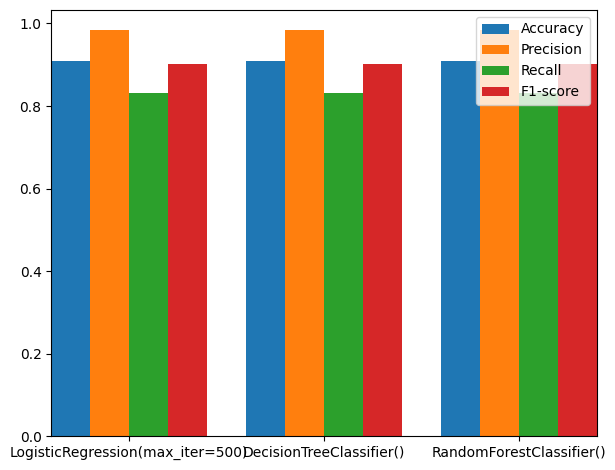

In [114]:
width = 0.2
x = np.arange(len(models))
fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1, width, label='F1-score')

ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
# add spacing between models
ax.set_xlim(x[0]-width*2, x[-1]+width*2)
plt.tight_layout()

plt.show()

# CFS(mutual_info_classif)

<Axes: >

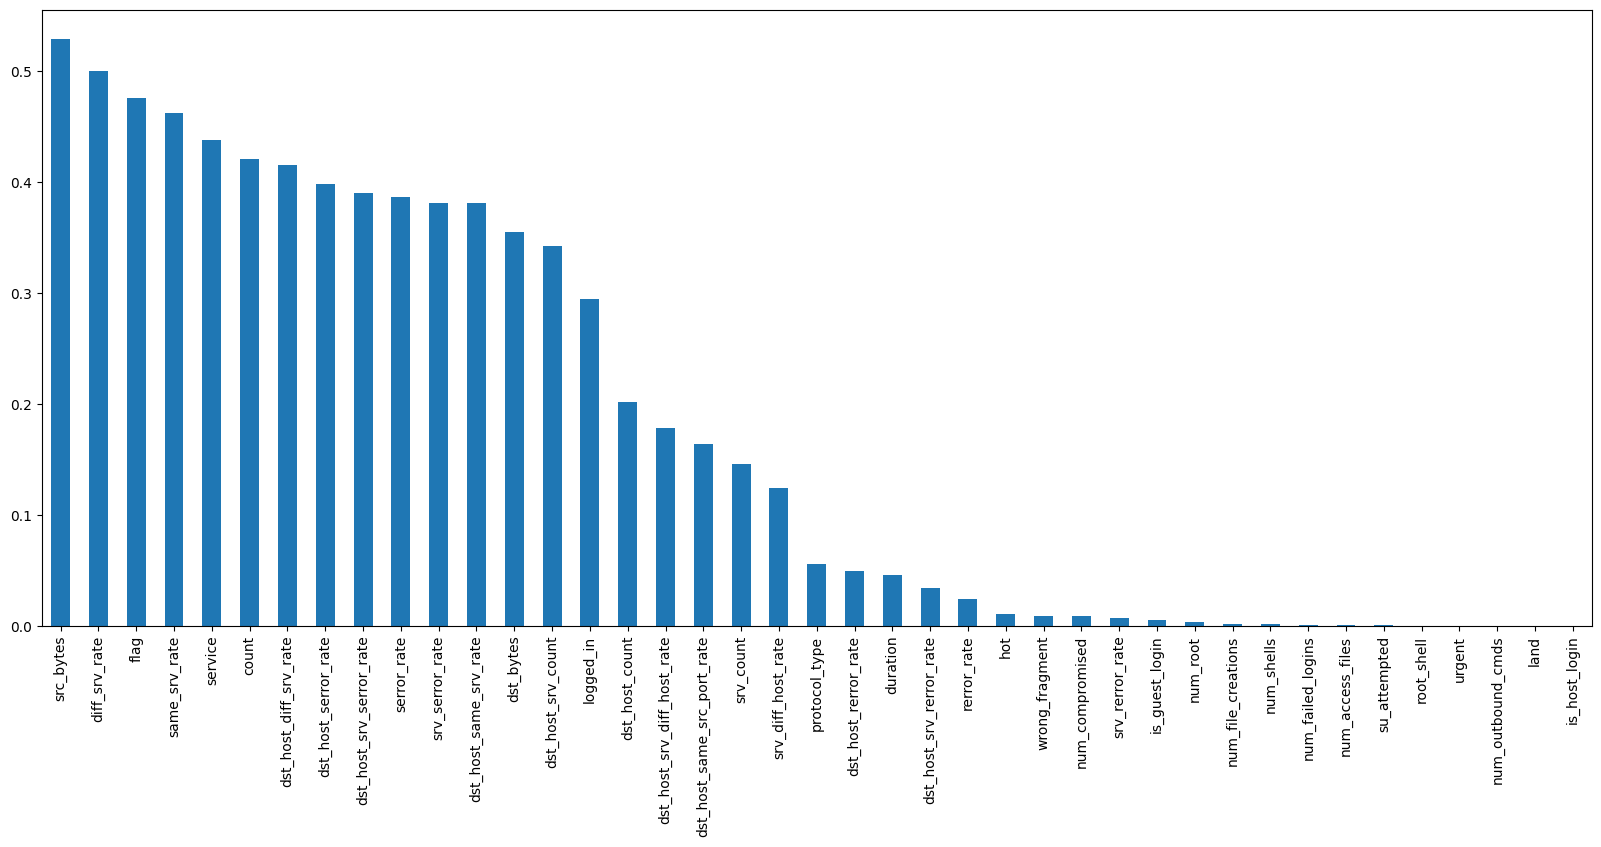

In [115]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(x_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [116]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif



# Feature selection using CFS
selector = SelectKBest(mutual_info_classif, k=40)
X_train_new = selector.fit_transform(x_train, y_train)
X_test_new = selector.transform(x_test)

# Get indices of selected features
selected_features_indices = selector.get_support(indices=True)

# Print selected features
selected_features = train.columns[selected_features_indices]
print("Selected features:", selected_features)

Selected features: Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
       'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
       'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')


#### Decision tree

Accuracy: 0.925763785394933 

                Predicted DOS  Predicted Not DOS
Actual DOS              15863                241
Actual Not DOS           2150              13954 

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93     16104
           1       0.98      0.87      0.92     16104

    accuracy                           0.93     32208
   macro avg       0.93      0.93      0.93     32208
weighted avg       0.93      0.93      0.93     32208



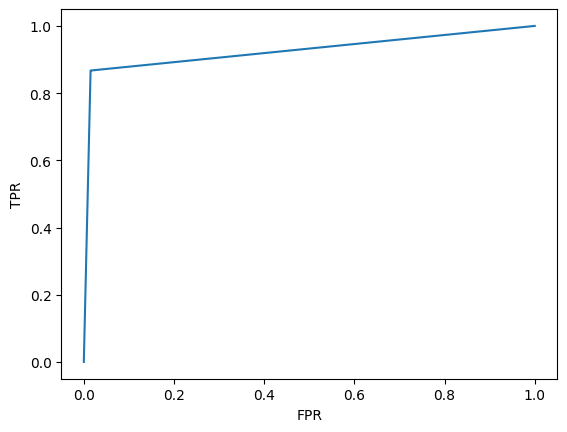

0.9261229256171202
False Alarm Rate: 0.014965226030799802


In [117]:
dt = DecisionTreeClassifier(random_state=88)

dt.fit(X_train_new, y_train)

predicted = dt.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")


Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

y_prob = dt.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)

#### Random forest

Accuracy: 0.9066070541480378 

                Predicted DOS  Predicted Not DOS
Actual DOS              15876                228
Actual Not DOS           2780              13324 

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91     16104
           1       0.98      0.83      0.90     16104

    accuracy                           0.91     32208
   macro avg       0.92      0.91      0.91     32208
weighted avg       0.92      0.91      0.91     32208



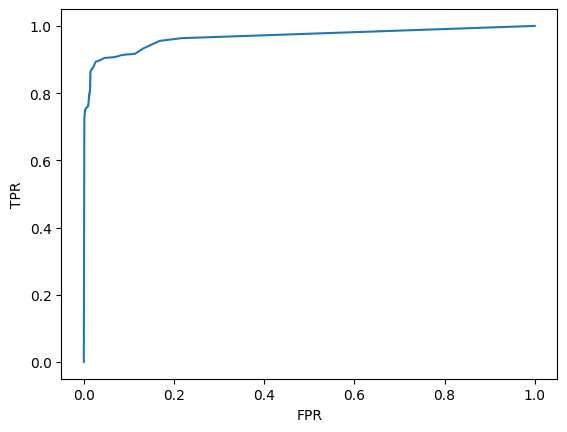

0.9670847614265348
False Alarm Rate: 0.014157973174366617


In [118]:
Rf =  RandomForestClassifier(n_estimators =100)
Rf.fit(X_train_new, y_train)



predicted = Rf.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = Rf.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)

#### Logistic regression

Accuracy: 0.9134376552409339 

                Predicted DOS  Predicted Not DOS
Actual DOS              15718                386
Actual Not DOS           2402              13702 

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     16104
           1       0.97      0.85      0.91     16104

    accuracy                           0.91     32208
   macro avg       0.92      0.91      0.91     32208
weighted avg       0.92      0.91      0.91     32208



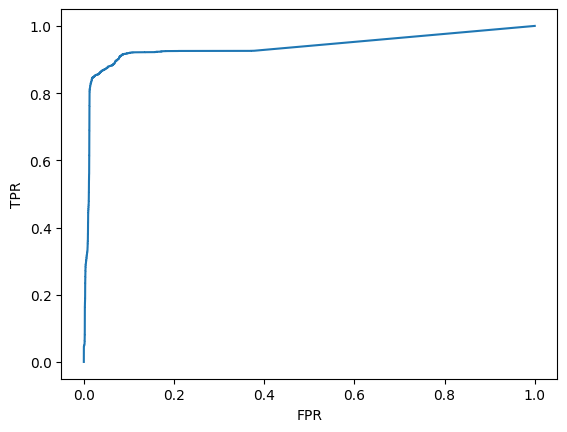

0.9369487230943477
False Alarm Rate: 0.023969200198708396


In [119]:
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression(max_iter=500)

Lr.fit(X_train_new,y_train)

predicted = Lr.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = Lr.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)

#### KNN

Accuracy: 0.8902446597118728 

                Predicted DOS  Predicted Not DOS
Actual DOS              15356                748
Actual Not DOS           2787              13317 

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90     16104
           1       0.95      0.83      0.88     16104

    accuracy                           0.89     32208
   macro avg       0.90      0.89      0.89     32208
weighted avg       0.90      0.89      0.89     32208



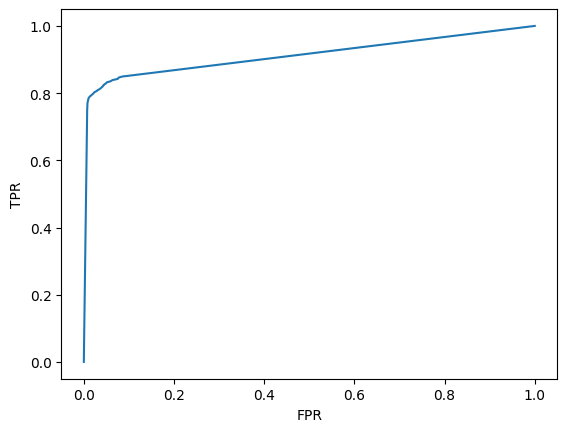

0.9125468842273113
False Alarm Rate: 0.04644808743169399


In [120]:
"""""""""""""""
k-NN Classifier

"""""""""""""""
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

kNN = KNeighborsClassifier(n_neighbors = 50, metric = 'minkowski', p = 1)

kNN.fit(X_train_new,y_train)

predicted = kNN.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

y_prob = kNN.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)

#### Naive Bayes

Accuracy: 0.6487518628912071 

                Predicted DOS  Predicted Not DOS
Actual DOS               5942              10162
Actual Not DOS           1151              14953 

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.37      0.51     16104
           1       0.60      0.93      0.73     16104

    accuracy                           0.65     32208
   macro avg       0.72      0.65      0.62     32208
weighted avg       0.72      0.65      0.62     32208



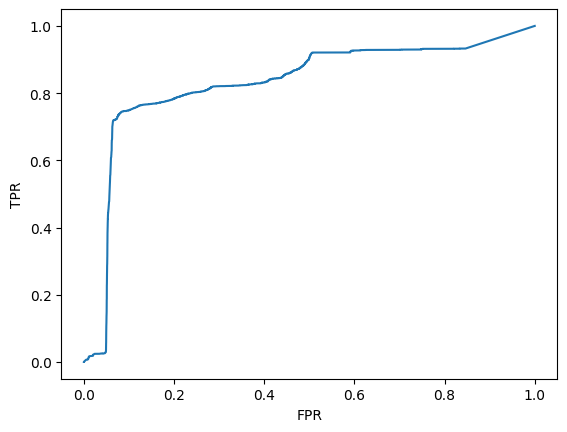

0.8295301695215574
False Alarm Rate: 0.631023348236463


In [121]:
"""""""""""""""
Naive Bayes Classifier

"""""""""""""""

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

NB = GaussianNB()

NB.fit(X_train_new,y_train)

predicted = NB.predict(X_test_new)

accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

y_prob = NB.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)

#### SVM

In [122]:
# """""""""""""""
# SVM Classifier

# """""""""""""""
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix, classification_report

# # Create a SVM classifier with RBF kernel
# svm = SVC(kernel='rbf',random_state=88)

# # Train the classifier using the training data
# svm.fit(X_train_new, y_train)

# predicted = svm.predict(X_test_new)
# accuracy = accuracy_score(y_test,predicted)
# print("Accuracy:", accuracy,"\n")
# Conf_Mat = confusion_matrix(y_test,predicted)
# Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

# print(Conf_Mat,"\n")
# report = classification_report(y_test,predicted)
# print("Classification report:\n", report)

# y_prob = NB.predict_proba(X_test_new)

# y_prob = y_prob[:,1]

# FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

# plt.plot(FPR,TPR)
# plt.xlabel('FPR')
# plt.ylabel('TPR')
# plt.show()
# from sklearn.metrics import roc_auc_score
# roc_auc_score = roc_auc_score(y_test,y_prob)
# print(roc_auc_score)
# # Calculate the confusion matrix
# tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()

# # Calculate the false alarm rate
# false_alarm_rate = fp / (fp + tn)
# print('False Alarm Rate:', false_alarm_rate)

In [123]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Step 1: Define list of models
models = [
    LogisticRegression(max_iter=500),
    DecisionTreeClassifier(random_state=88),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors = 50, metric = 'minkowski', p = 1),
    RandomForestClassifier(n_estimators =100)
]

# Step 2: Define dictionary to store evaluation metrics
eval_metrics = {}



# Step 4: Evaluate each model
for model in models:
    model_name = type(model).__name__
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    eval_metrics[model_name] = [accuracy, precision, recall, f1]

# Step 5: Convert dictionary to dataframe
df = pd.DataFrame(eval_metrics, index=['accuracy', 'precision', 'recall', 'f1-score'])

# Step 6: Return dataframe
print(df)


           LogisticRegression  DecisionTreeClassifier  GaussianNB  \
accuracy             0.912630                0.926105    0.648752   
precision            0.967234                0.983648    0.595381   
recall               0.854198                0.866617    0.928527   
f1-score             0.907208                0.921431    0.725539   

           KNeighborsClassifier  RandomForestClassifier  
accuracy               0.890245                0.909650  
precision              0.946818                0.983297  
recall                 0.826937                0.833458  
f1-score               0.882827                0.902198  


# Embedded Methods

### chi2

<Axes: >

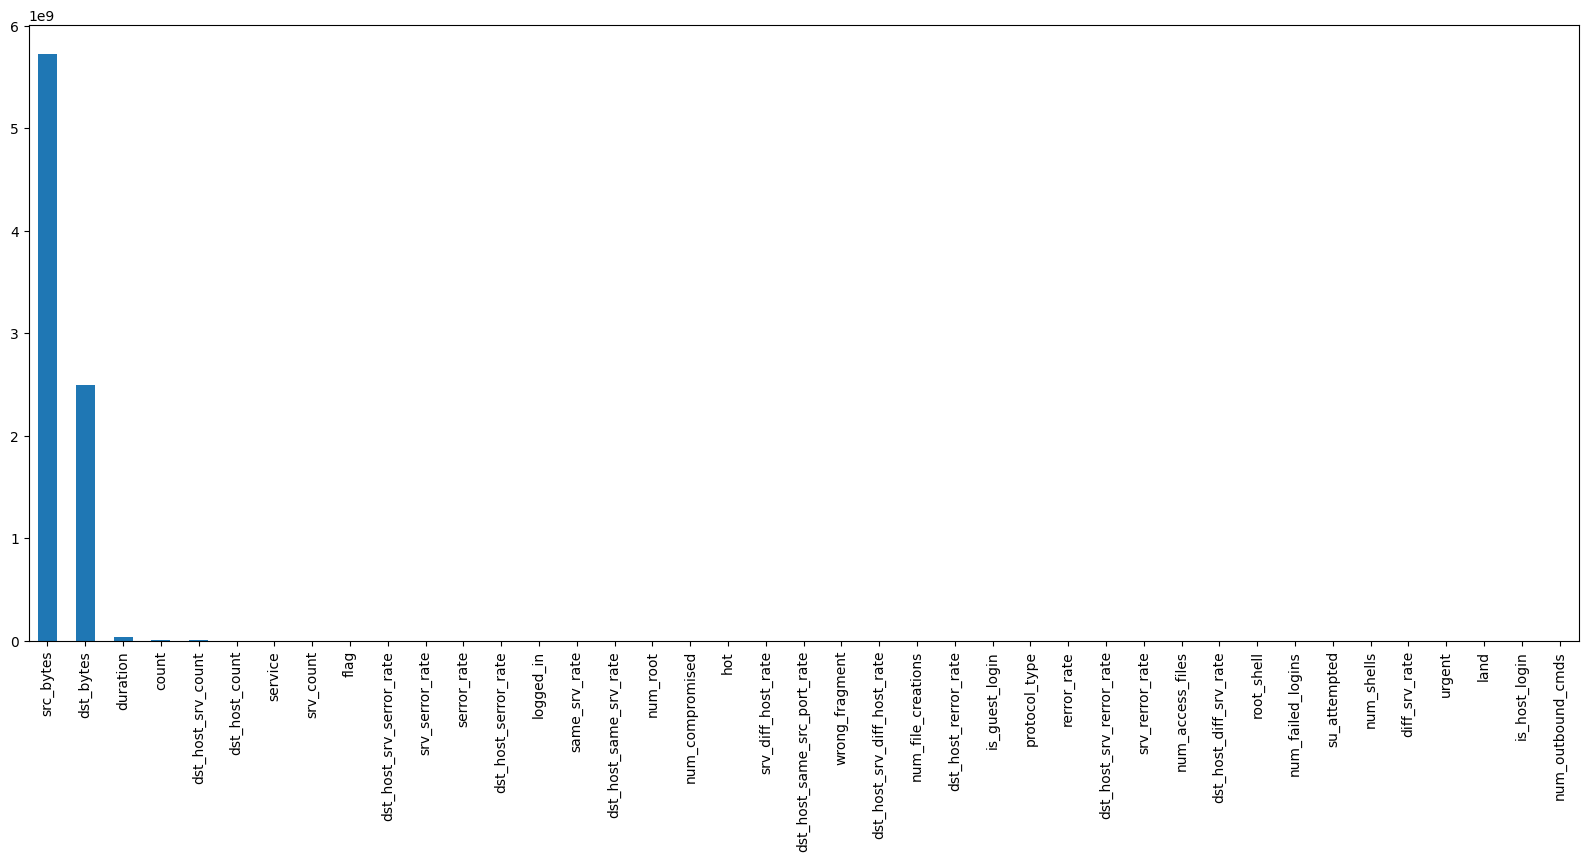

In [124]:
from sklearn.feature_selection import chi2

chi_scores, p_values = chi2(x_train, y_train)
chi_scores = pd.Series(chi_scores)
p_values = pd.Series(p_values)
chi_scores.index = p_values.index = x_train.columns
chi_scores.sort_values(ascending=False)
chi_scores.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [125]:
from sklearn.feature_selection import SelectKBest

# Feature extraction
selector = SelectKBest(score_func=chi2, k=13)
X_train_new = selector.fit_transform(x_train, y_train)
X_test_new = selector.transform(x_test)
# Get indices of selected features
selected_features_indices = selector.get_support(indices=True)

# Print selected features
selected_features = train.columns[selected_features_indices]
print("Selected features:", selected_features)

Selected features: Index(['duration', 'service', 'flag', 'src_bytes', 'dst_bytes', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate'],
      dtype='object')


#### Decision tree

Accuracy: 0.8927906110283159 

                Predicted DOS  Predicted Not DOS
Actual DOS              15442                662
Actual Not DOS           2791              13313 

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90     16104
           1       0.95      0.83      0.89     16104

    accuracy                           0.89     32208
   macro avg       0.90      0.89      0.89     32208
weighted avg       0.90      0.89      0.89     32208



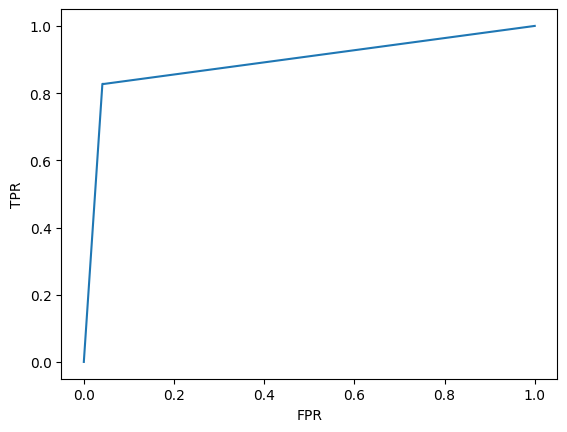

0.8927818078725245
False Alarm Rate: 0.04110779930452062


In [126]:
dt = DecisionTreeClassifier()
dt.fit(X_train_new, y_train)
predicted = dt.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

y_prob = dt.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)

#### Random forest

Accuracy: 0.8986587183308494 

                Predicted DOS  Predicted Not DOS
Actual DOS              15866                238
Actual Not DOS           3026              13078 

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91     16104
           1       0.98      0.81      0.89     16104

    accuracy                           0.90     32208
   macro avg       0.91      0.90      0.90     32208
weighted avg       0.91      0.90      0.90     32208



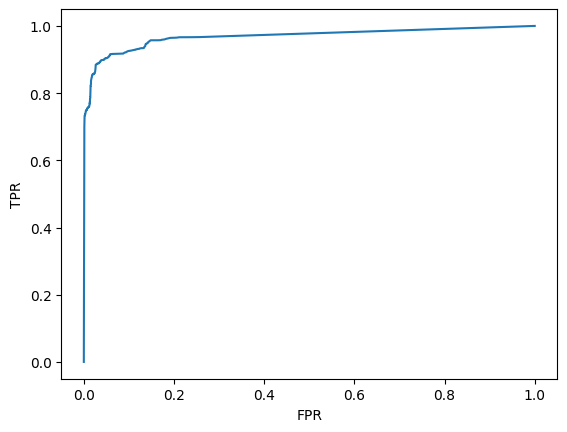

0.968189646165424
False Alarm Rate: 0.014778936910084452


In [127]:
Rf =  RandomForestClassifier(n_estimators =1000,max_depth=40,random_state=88)
Rf.fit(X_train_new, y_train)



predicted = Rf.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = Rf.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)

#### Logistic regression

Accuracy: 0.8969510680576255 

                Predicted DOS  Predicted Not DOS
Actual DOS              15103               1001
Actual Not DOS           2318              13786 

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90     16104
           1       0.93      0.86      0.89     16104

    accuracy                           0.90     32208
   macro avg       0.90      0.90      0.90     32208
weighted avg       0.90      0.90      0.90     32208



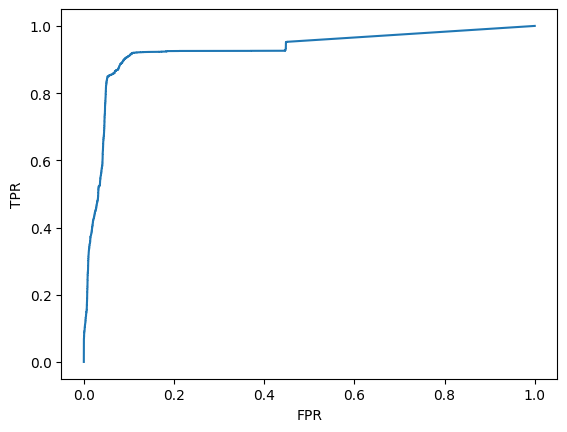

0.9264516211102006
False Alarm Rate: 0.06215846994535519


In [128]:
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression()

Lr.fit(X_train_new,y_train)

predicted = Lr.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = Lr.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)

In [129]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Step 1: Define list of models
models = [
    LogisticRegression(max_iter=500),
    DecisionTreeClassifier(random_state=88),
    RandomForestClassifier(n_estimators =1000,max_depth=40,random_state=88)
]

# Step 2: Define dictionary to store evaluation metrics
eval_metrics = {}



# Step 4: Evaluate each model
for model in models:
    model_name = type(model).__name__
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    eval_metrics[model_name] = [accuracy, precision, recall, f1]

# Step 5: Convert dictionary to dataframe
df = pd.DataFrame(eval_metrics, index=['accuracy', 'precision', 'recall', 'f1-score'])

# Step 6: Return dataframe
print(df)


           LogisticRegression  DecisionTreeClassifier  RandomForestClassifier
accuracy             0.912630                0.926105                0.910550
precision            0.967234                0.983648                0.983261
recall               0.854198                0.866617                0.835320
f1-score             0.907208                0.921431                0.903273


# features selection using Pearson's correlated

#### Decision tree

In [137]:
# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


# Define the number of features to select
k = 5

# Select k best features based on Pearson's correlation coefficient
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(x_train, y_train)

# Get the indices of the selected features
selected_features = selector.get_support(indices=True)

# Create a new dataset with the selected features
X_selected = x_train.iloc[:, selected_features]

# Train the decision tree on the selected features
tree_model = DecisionTreeClassifier()
tree_model.fit(X_selected, y_train)

# Predict the target variable using the trained model
predictions = tree_model.predict(x_test.iloc[:, selected_features])
accuracy = accuracy_score(y_test,predictions)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predictions)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predictions)
print("Classification report:\n", report)


# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)


Accuracy: 0.822807998012916 

                Predicted DOS  Predicted Not DOS
Actual DOS              15303                801
Actual Not DOS           4906              11198 

Classification report:
               precision    recall  f1-score   support

           0       0.76      0.95      0.84     16104
           1       0.93      0.70      0.80     16104

    accuracy                           0.82     32208
   macro avg       0.85      0.82      0.82     32208
weighted avg       0.85      0.82      0.82     32208

False Alarm Rate: 0.04973919523099851


#### Random forest

In [138]:
# Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression



# Define the number of features to select
k = 5

# Select k best features based on Pearson's correlation coefficient
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(x_train, y_train)

# Get the indices of the selected features
selected_features = selector.get_support(indices=True)

# Create a new dataset with the selected features
X_selected = x_train.iloc[:, selected_features]

# Train the Random Forest on the selected features
rf_model = RandomForestClassifier(n_estimators=110, max_depth = 30, random_state=88)
rf_model.fit(X_selected, y_train)

# Predict the target variable using the trained model
predictions = rf_model.predict(x_test.iloc[:, selected_features])
accuracy = accuracy_score(y_test,predictions)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predictions)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predictions)
print("Classification report:\n", report)
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)


Accuracy: 0.8209451068057625 

                Predicted DOS  Predicted Not DOS
Actual DOS              15283                821
Actual Not DOS           4946              11158 

Classification report:
               precision    recall  f1-score   support

           0       0.76      0.95      0.84     16104
           1       0.93      0.69      0.79     16104

    accuracy                           0.82     32208
   macro avg       0.84      0.82      0.82     32208
weighted avg       0.84      0.82      0.82     32208

False Alarm Rate: 0.05098112270243418


#### Logistic regression

In [139]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression



# Define the number of features to select
k = 5

# Select k best features based on Pearson's correlation coefficient
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(x_train, y_train)

# Get the indices of the selected features
selected_features = selector.get_support(indices=True)

# Create a new dataset with the selected features
X_selected = x_train.iloc[:, selected_features]

# Train the logistic regression model on the selected features
lr_model = LogisticRegression()
lr_model.fit(X_selected, y_train)

# Predict the target variable using the trained model
predictions = lr_model.predict(x_test.iloc[:, selected_features])
accuracy = accuracy_score(y_test,predictions )
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predictions )
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predictions )
print("Classification report:\n", report)
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)


Accuracy: 0.8421510183805265 

                Predicted DOS  Predicted Not DOS
Actual DOS              14714               1390
Actual Not DOS           3694              12410 

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85     16104
           1       0.90      0.77      0.83     16104

    accuracy                           0.84     32208
   macro avg       0.85      0.84      0.84     32208
weighted avg       0.85      0.84      0.84     32208

False Alarm Rate: 0.08631395926477893


In [140]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Step 1: Define list of models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=110, max_depth = 30, random_state=88)
]

# Step 2: Define dictionary to store evaluation metrics
eval_metrics = {}



# Step 4: Evaluate each model
for model in models:
    model_name = type(model).__name__
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    eval_metrics[model_name] = [accuracy, precision, recall, f1]

# Step 5: Convert dictionary to dataframe
df = pd.DataFrame(eval_metrics, index=['accuracy', 'precision', 'recall', 'f1-score'])

# Step 6: Return dataframe
print(df)


           LogisticRegression  DecisionTreeClassifier  RandomForestClassifier
accuracy             0.909060                0.926261                0.906793
precision            0.956103                0.983790                0.983112
recall               0.857489                0.866803                0.827807
f1-score             0.904115                0.921599                0.898800


comparing the two algorithms

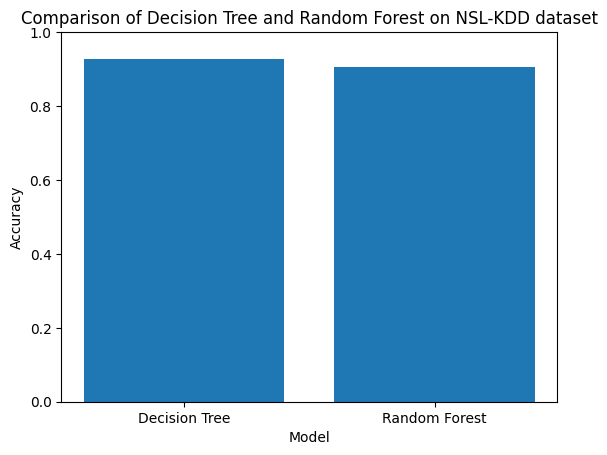

In [141]:
# Plot the comparison graph
import matplotlib.pyplot as plt

models = ['Decision Tree', 'Random Forest']
accuracies = [accuracy1, accuracy2]

plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.title('Comparison of Decision Tree and Random Forest on NSL-KDD dataset')
plt.show()

 ROC curve

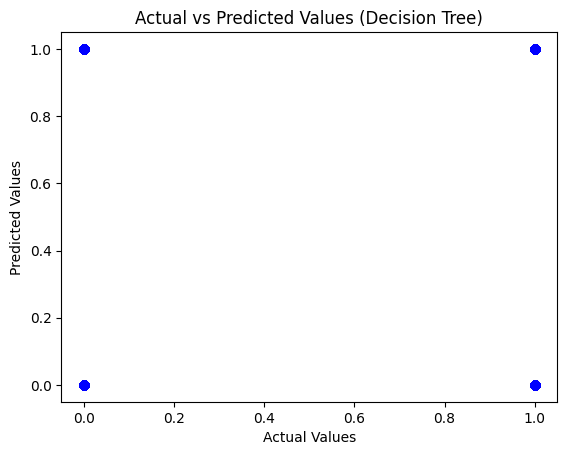

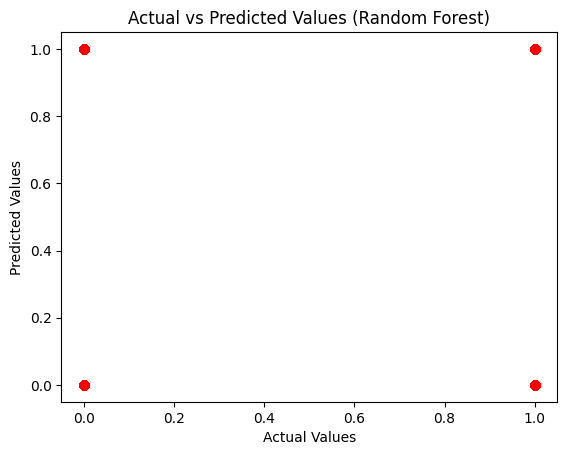

In [142]:
import matplotlib.pyplot as plt

# Plot the scatter plot for actual vs predicted values for Decision Tree
plt.scatter(y_test, predicted, color='blue')
plt.title('Actual vs Predicted Values (Decision Tree)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Plot the scatter plot for actual vs predicted values for Random Forest
plt.scatter(y_test, y_pred, color='red')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

